### Опис змінних

#### **Дані про клієнта банку**:
1. **age** – вік клієнта (числова змінна).  
2. **job** – вид зайнятості (категоріальна змінна: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** – сімейний стан (категоріальна змінна: `divorced`, `married`, `single`, `unknown`; примітка: `divorced` означає розлучений або вдівець/вдова).  
4. **education** – рівень освіти (категоріальна змінна: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** – чи є у клієнта прострочений кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
6. **housing** – чи має клієнт іпотечний кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
7. **loan** – чи має клієнт споживчий кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  

#### **Дані про останній контакт у межах поточної маркетингової кампанії**:
8. **contact** – тип зв’язку при останньому контакті (категоріальна змінна: `cellular`, `telephone`).  
9. **month** – місяць останнього контакту (категоріальна змінна: `jan`, `feb`, `mar`, …, `nov`, `dec`).  
10. **day_of_week** – день тижня останнього контакту (категоріальна змінна: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** – тривалість останнього контакту в секундах (числова змінна).  
   ⚠ **Важлива примітка**: ця змінна має суттєвий вплив на цільову змінну (наприклад, якщо duration = 0, то y = `no`). Однак значення duration невідоме до здійснення дзвінка. Крім того, після завершення дзвінка значення y вже відоме. Тому цю змінну варто використовувати лише для порівняння моделей, але не включати у фінальну передбачувальну модель.  

#### **Інші атрибути**:
12. **campaign** – кількість контактів у межах поточної кампанії для цього клієнта (числова змінна, включає останній контакт).  
13. **pdays** – кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії (числова змінна; значення 999 означає, що клієнт раніше не контактувався).  
14. **previous** – кількість контактів, здійснених до цієї кампанії для цього клієнта (числова змінна).  
15. **poutcome** – результат попередньої маркетингової кампанії (категоріальна змінна: `failure`, `nonexistent`, `success`).  

#### **Атрибути соціально-економічного контексту**:
16. **emp.var.rate** – темп зміни зайнятості (щоквартальний показник, числова змінна).  
17. **cons.price.idx** – індекс споживчих цін (щомісячний показник, числова змінна).  
18. **cons.conf.idx** – індекс довіри споживачів (щомісячний показник, числова змінна).  
19. **euribor3m** – ставка Euribor на 3 місяці (щоденний показник, числова змінна).  
20. **nr.employed** – кількість працевлаштованих осіб (щоквартальний показник, числова змінна).  

#### **Цільова змінна**:
21. **y** – чи підписав клієнт строковий депозит? (бінарна змінна: `yes`, `no`).

### 1. EDA

### Імпорти і знайомство з даними

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

os.chdir('/Users/buvka_yu/Documents/DS/data/bank_deposit_prediction')

In [4]:
df = pd.read_csv('bank-additional-full.csv', sep=";", encoding="latin1")
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Бачимо, що нульових значень в даних немає. Маємо 10 категоріальних змінних, окрім цільової.

In [6]:
df['y'].value_counts(normalize=True) * 100

y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64

In [7]:
cat_cols = ['job','marital','education','default','housing','loan','poutcome','contact']
for c in cat_cols:
    df[c] = df[c].astype('category')

In [8]:
unknown_share = (
    df[cat_cols]
    .apply(lambda s: (s.astype(str).str.lower()=='unknown').mean())
    .sort_values(ascending=False)
)
unknown_share

default      0.208726
education    0.042027
housing      0.024036
loan         0.024036
job          0.008012
marital      0.001942
poutcome     0.000000
contact      0.000000
dtype: float64

У категоріальних змінних частка unknown невелика (2–4%), виняток - default (~21%). Тому ми залишаємо unknown як окремий рівень, щоб зберегти інформативність.

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Аналіз числових змінних

,count,mean,std,min,25%,50%,75%,max,IQR,lower_bound,upper_bound,outlier_share
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000,15.000,9.5000,69.5000,1.138681
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000,217.000,-223.5000,644.5000,7.193843
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000,2.000,-2.0000,6.0000,5.841507
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000,0.000,999.0000,999.0000,3.678256
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000,0.000,0.0000,0.0000,13.656890
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400,3.200,-6.6000,6.2000,0.000000
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767,0.919,91.6965,95.3725,0.000000
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900,6.300,-52.1500,-26.9500,1.085268
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045,3.617,-4.0815,10.3865,0.000000
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100,129.000,4905.6000,5421.6000,0.000000


Топ-5 змінних за відсотком викидів:
previous    13.656890
duration     7.193843
campaign     5.841507
pdays        3.678256
age          1.138681
Name: outlier_share, dtype: float64


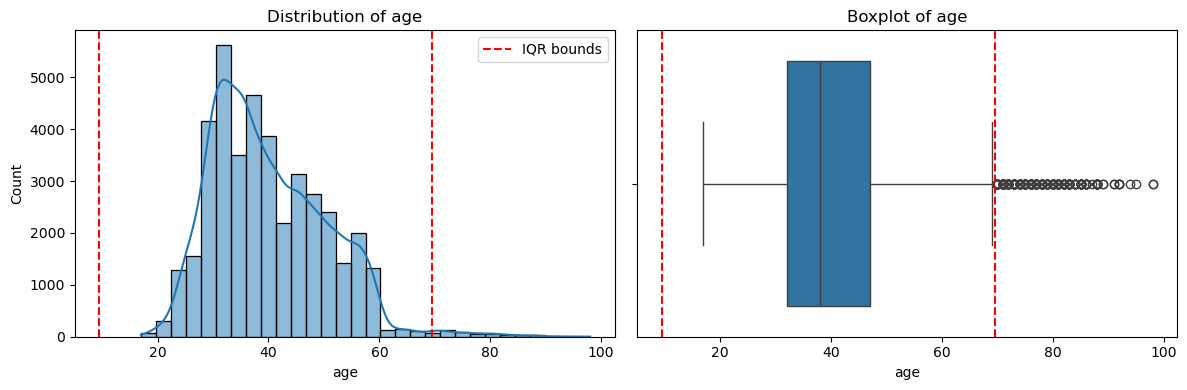

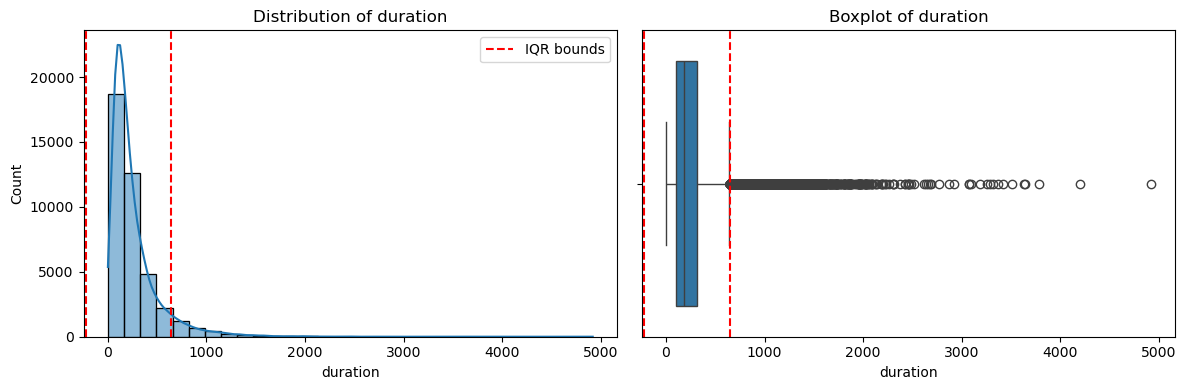

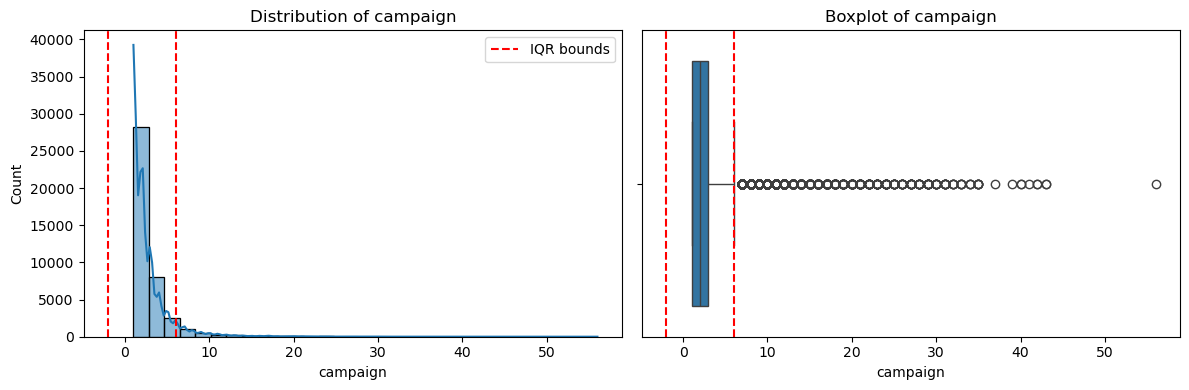

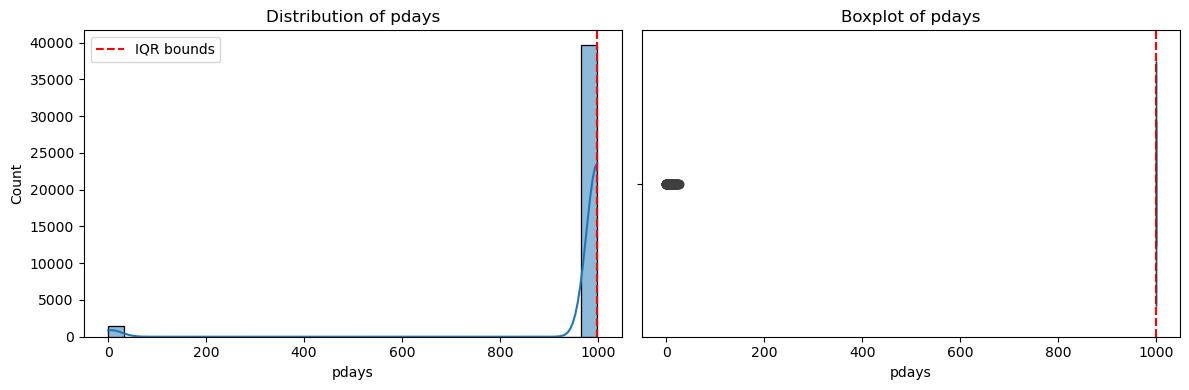

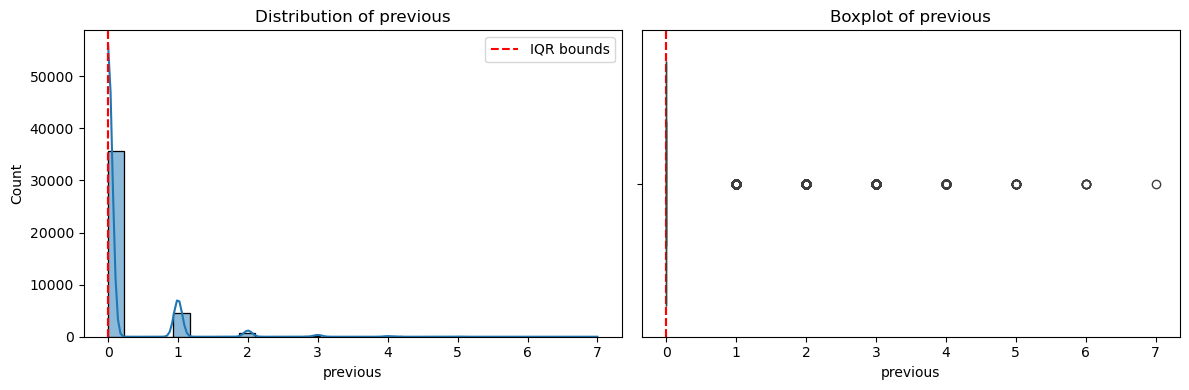

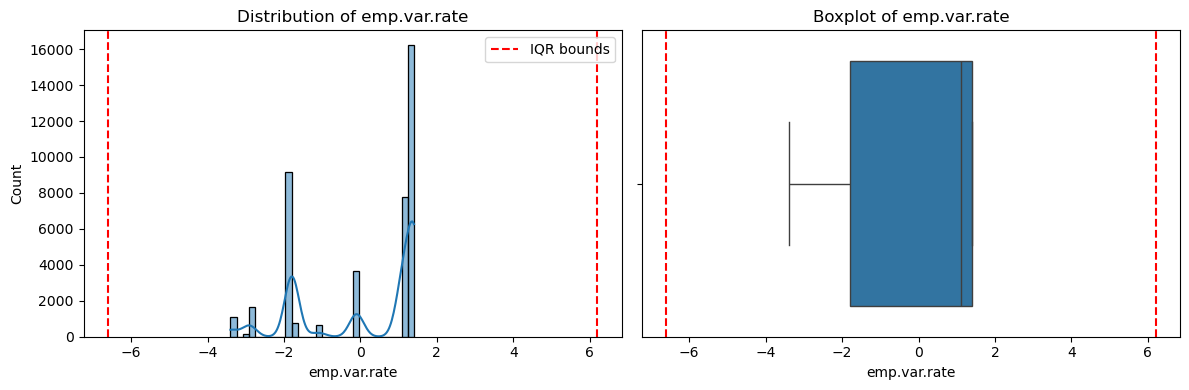

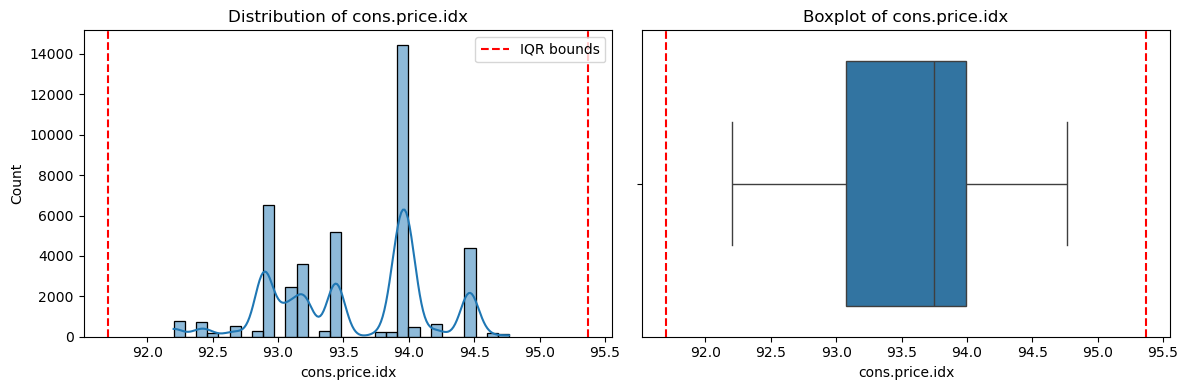

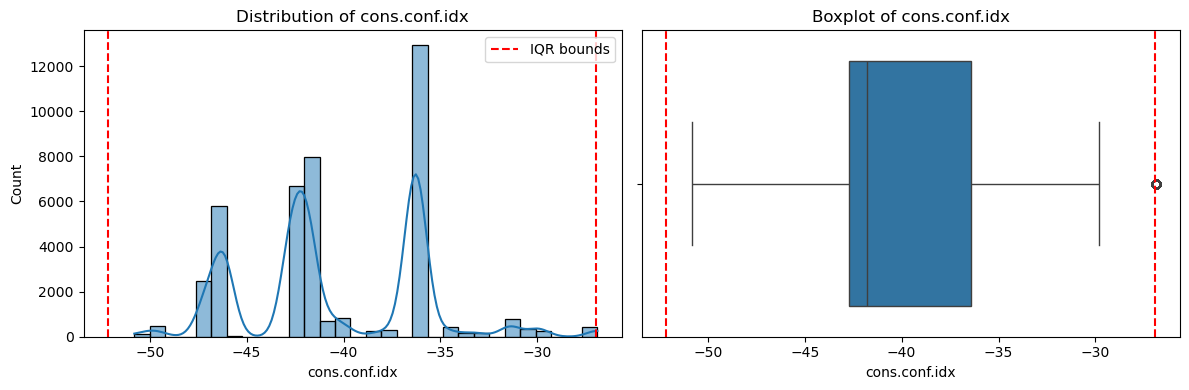

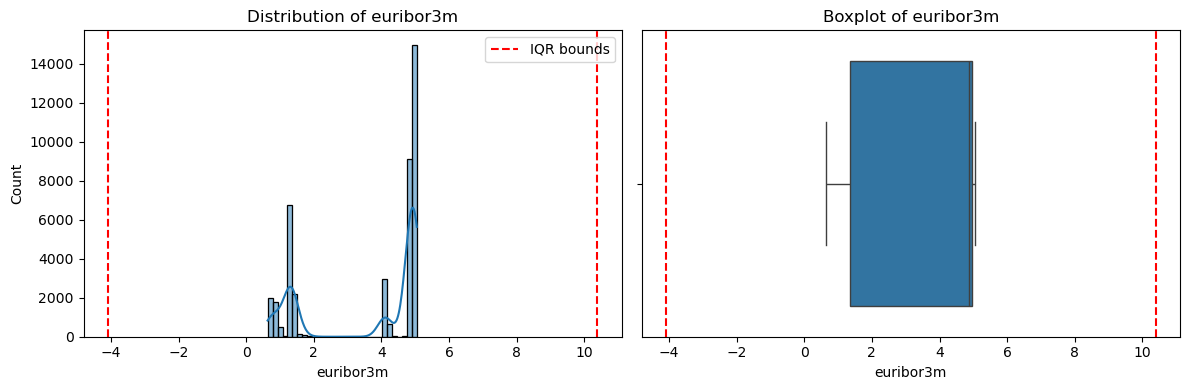

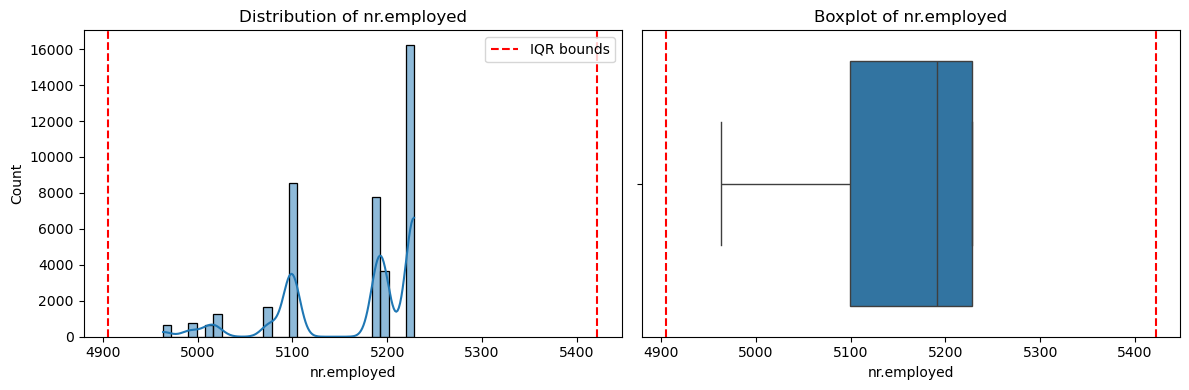

In [10]:
if 'y' in df.columns:
    df['y_bin'] = df['y'].map({'no': 0, 'yes': 1}).astype('int8')

num_cols = df.select_dtypes(include=['number']).columns
if 'y_bin' in num_cols:
    num_cols = num_cols.drop('y_bin')

# Описова статистика + IQR
desc = df[num_cols].describe().T
desc['IQR'] = desc['75%'] - desc['25%']

# Межі для викидів + частка
desc['lower_bound'] = desc['25%'] - 1.5 * desc['IQR']
desc['upper_bound'] = desc['75%'] + 1.5 * desc['IQR']

desc['outlier_share'] = [
    (((df[c] < desc.loc[c,'lower_bound']) | 
      (df[c] > desc.loc[c,'upper_bound'])).mean()) * 100
    for c in num_cols
]

display(desc[['count','mean','std','min','25%','50%','75%','max','IQR','lower_bound','upper_bound','outlier_share']])

# Топ-5 змінних з найбільшою кількістю викидів
print("Топ-5 змінних за відсотком викидів:")
print(desc['outlier_share'].sort_values(ascending=False).head(5))

# Візуалізації
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    # Гістограма + KDE
    sns.histplot(df[col], kde=True, bins=30, ax=axes[0])
    axes[0].axvline(desc.loc[col,'lower_bound'], color='red', linestyle='--', label='IQR bounds')
    axes[0].axvline(desc.loc[col,'upper_bound'], color='red', linestyle='--')
    axes[0].set_title(f"Distribution of {col}")
    axes[0].legend()

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].axvline(desc.loc[col,'lower_bound'], color='red', linestyle='--')
    axes[1].axvline(desc.loc[col,'upper_bound'], color='red', linestyle='--')
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


Бачимо, що частку викидів мають дані по віку, аномальна тривалість дзвінка та кількість контактів в межах кампаній, які отримував користувач.

### Аналіз категоріальних змінних


job value counts (%):
job
admin.            25.3%
blue-collar      22.47%
technician       16.37%
services          9.64%
management         7.1%
retired           4.18%
entrepreneur      3.54%
self-employed     3.45%
housemaid         2.57%
unemployed        2.46%
student           2.12%
unknown            0.8%
Name: proportion, dtype: object

marital value counts (%):
marital
married     60.52%
single      28.09%
divorced     11.2%
unknown      0.19%
Name: proportion, dtype: object

education value counts (%):
education
university.degree      29.54%
high.school             23.1%
basic.9y               14.68%
professional.course    12.73%
basic.4y               10.14%
basic.6y                5.56%
unknown                  4.2%
illiterate              0.04%
Name: proportion, dtype: object

default value counts (%):
default
no         79.12%
unknown    20.87%
yes         0.01%
Name: proportion, dtype: object

housing value counts (%):
housing
yes        52.38%
no         45.21%
unknown

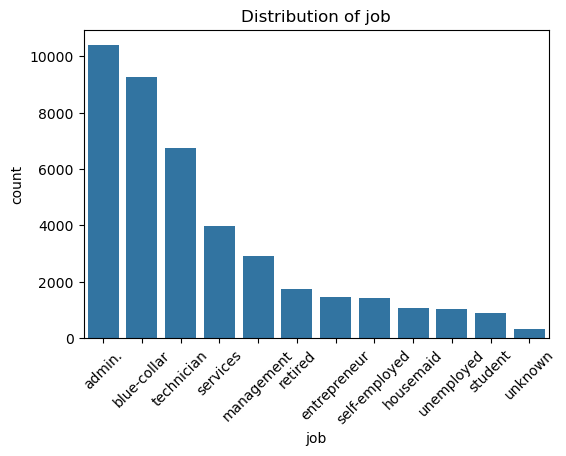

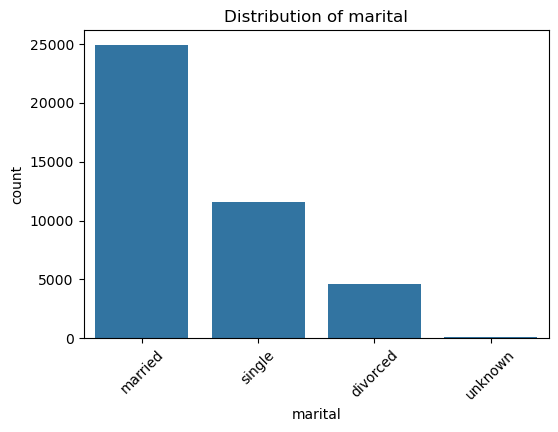

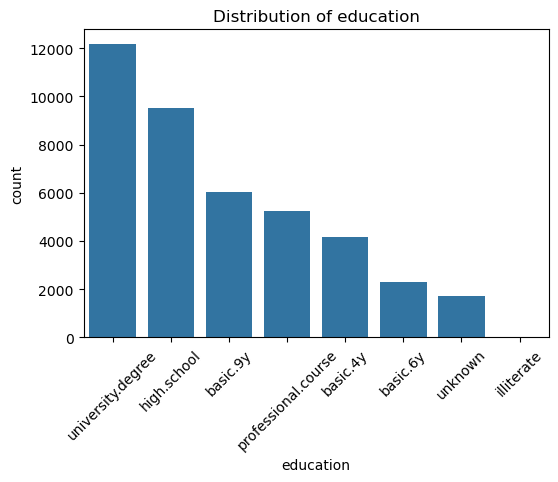

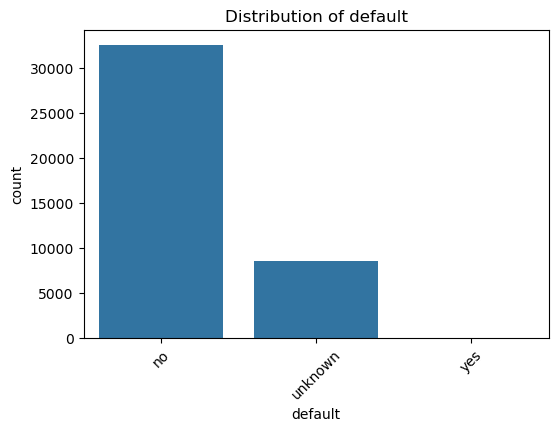

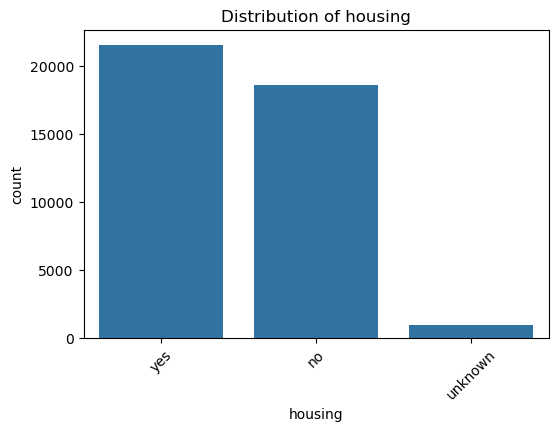

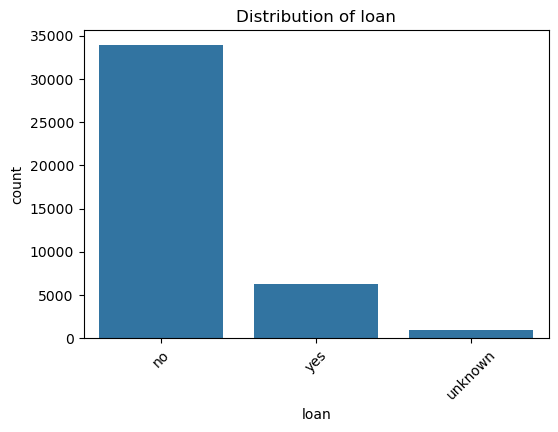

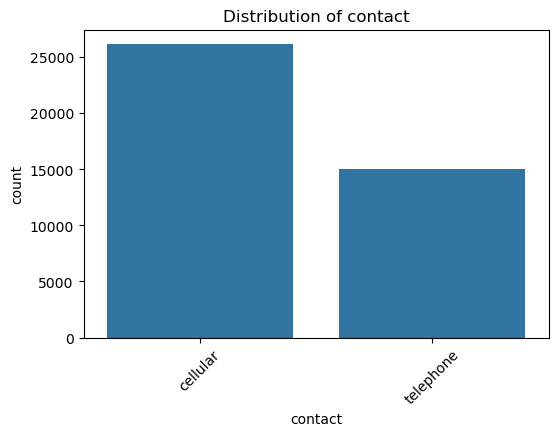

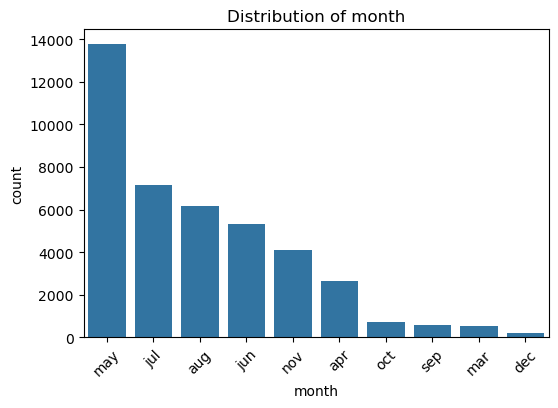

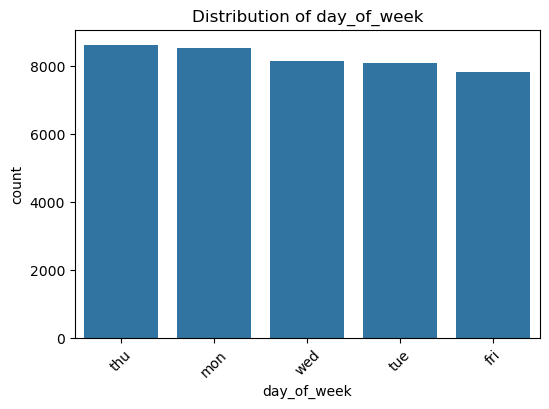

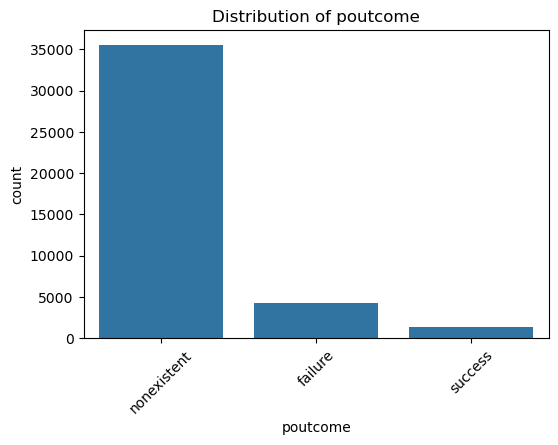

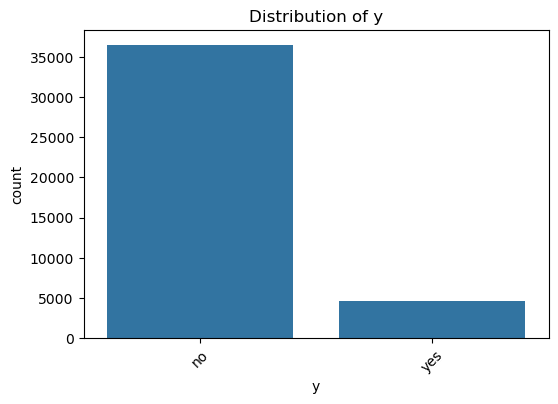

In [11]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    print(f"\n{col} value counts (%):")
    print((df[col].value_counts(normalize=True) * 100).round(2).astype(str) + '%')

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


Бачимо, що серед типу роботи є найбільш популярні і мала частка невідомих даних. Майже 80% клієнтів немає простроченого кредиту, понад 52% мають іпотечний кредит. Результативність попереднох кампанії була невеликою, 3,33% серед усіх клієнтів. 

### Аналіз взаємозв'язків

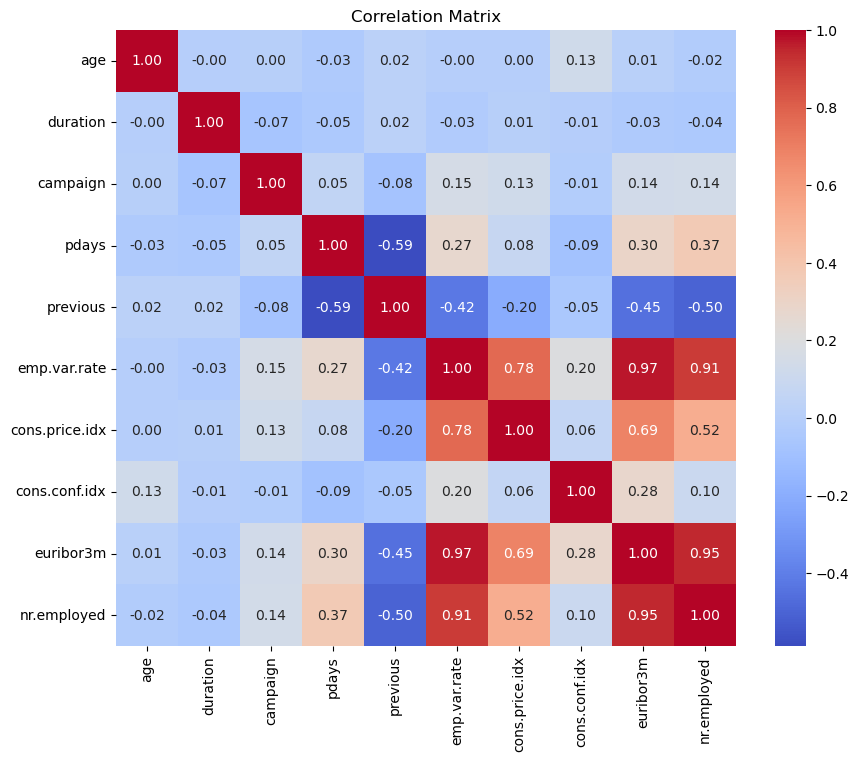

In [12]:
# Кореляційна матриця для числових змінних між собою
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

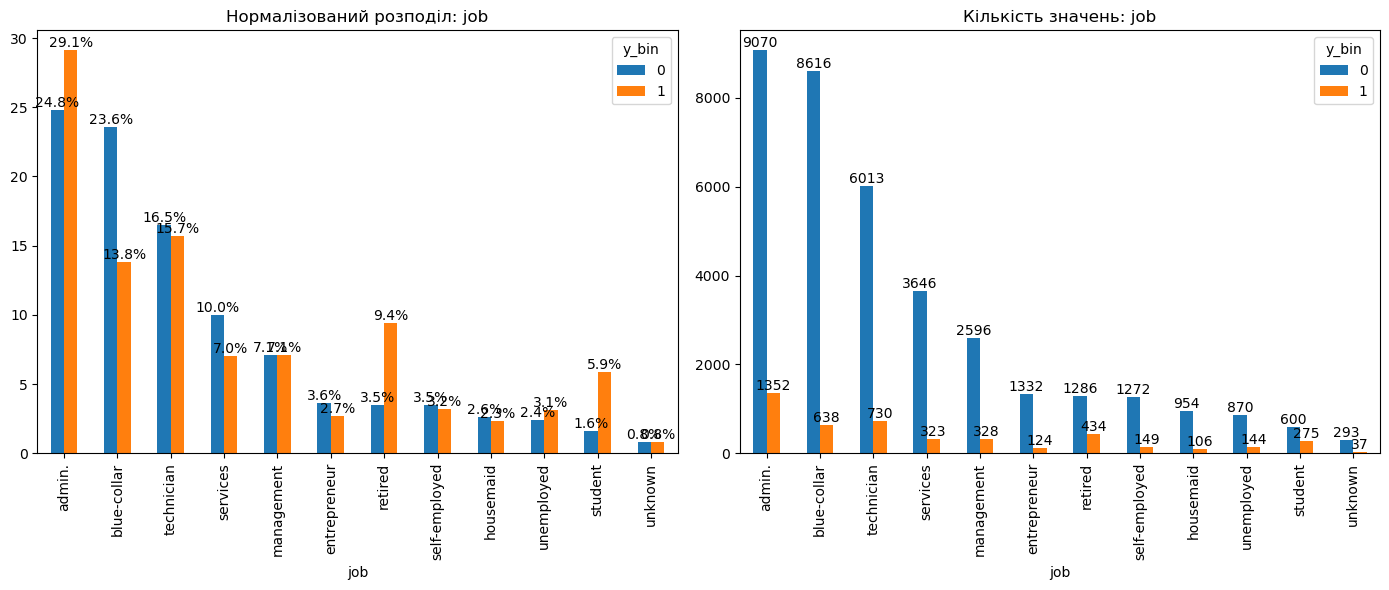

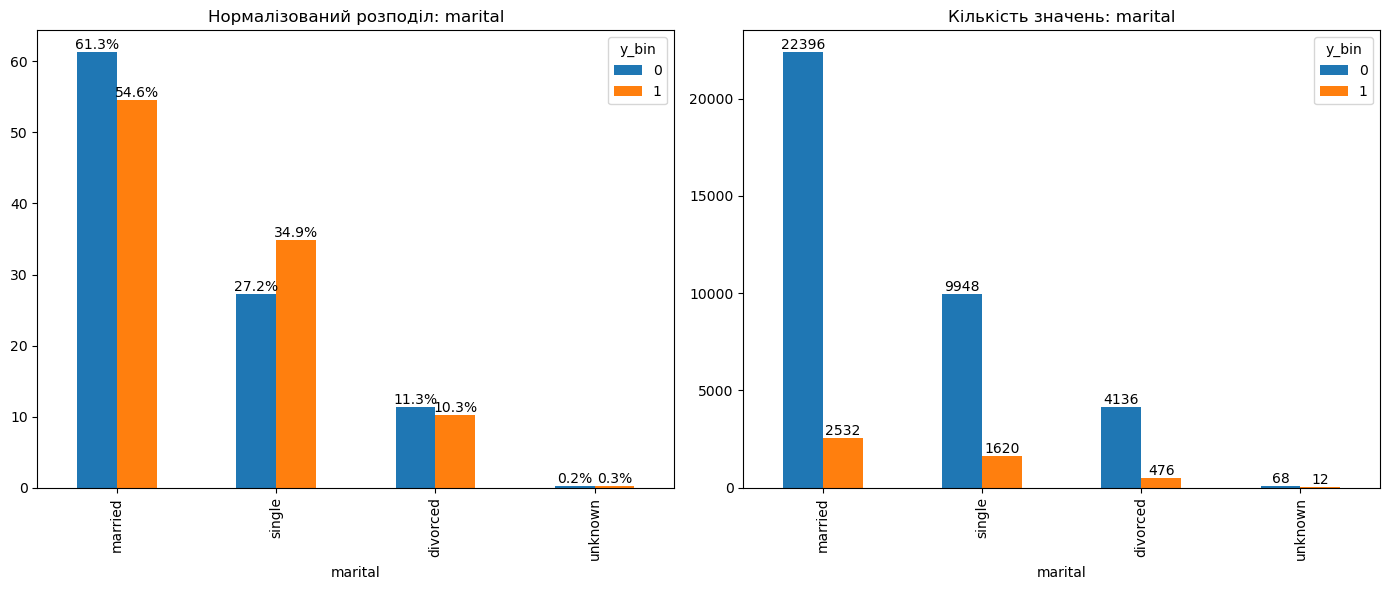

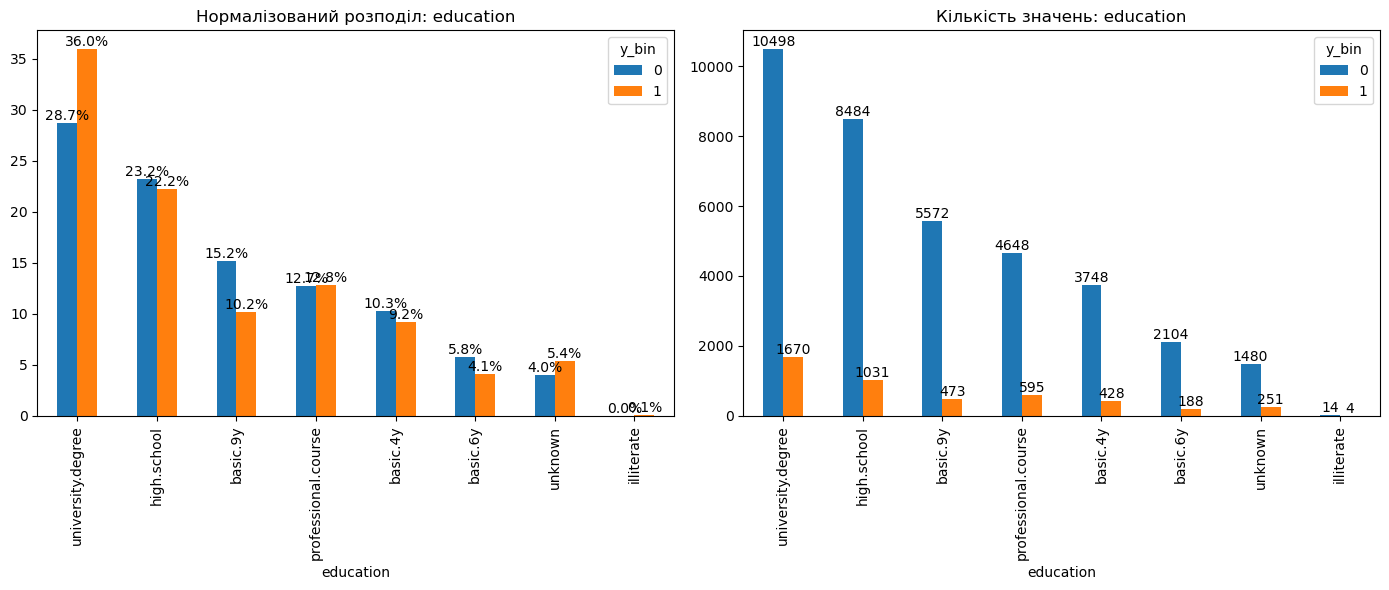

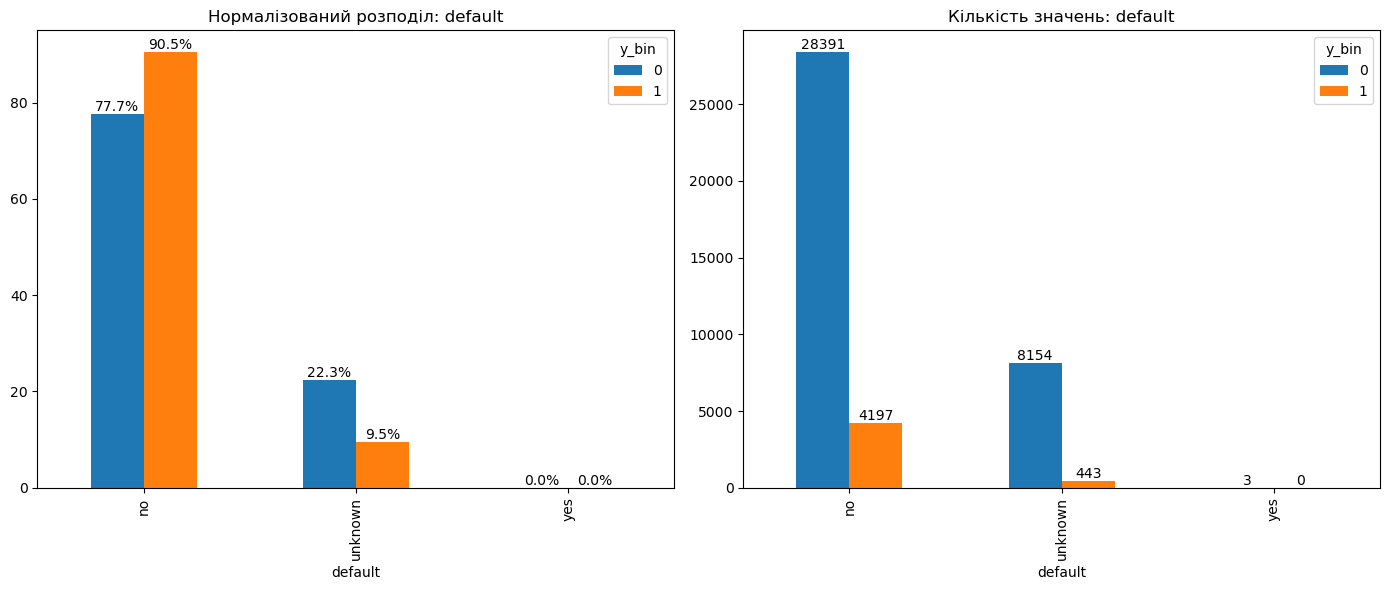

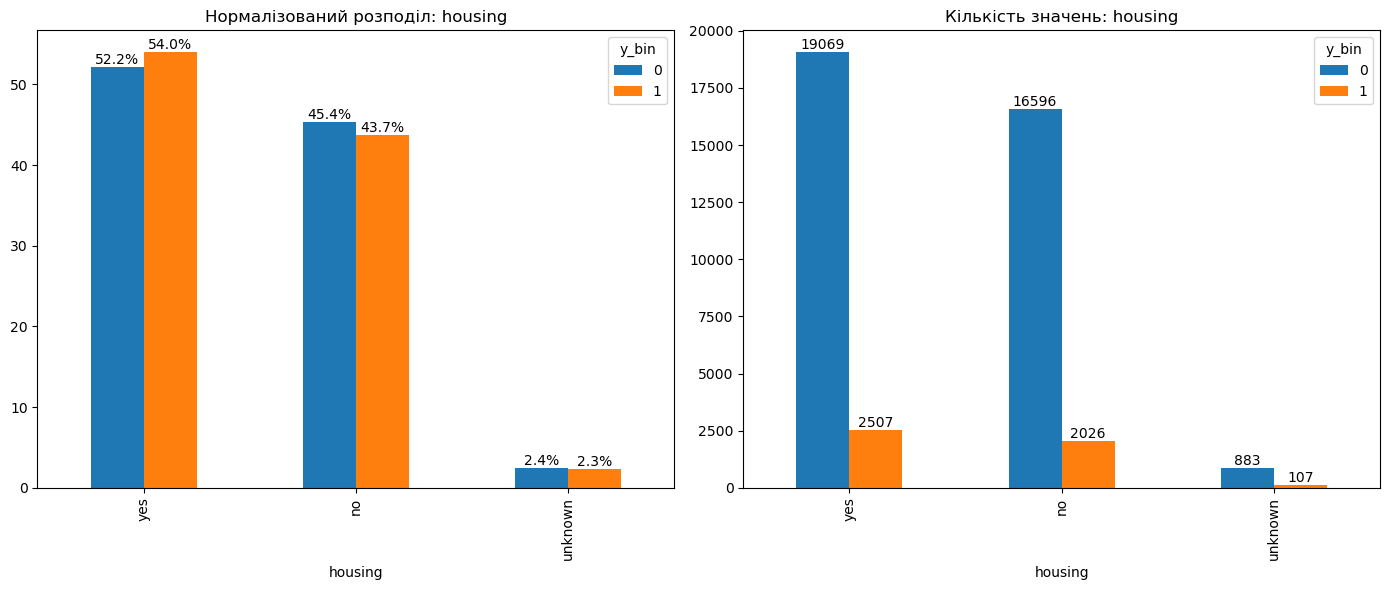

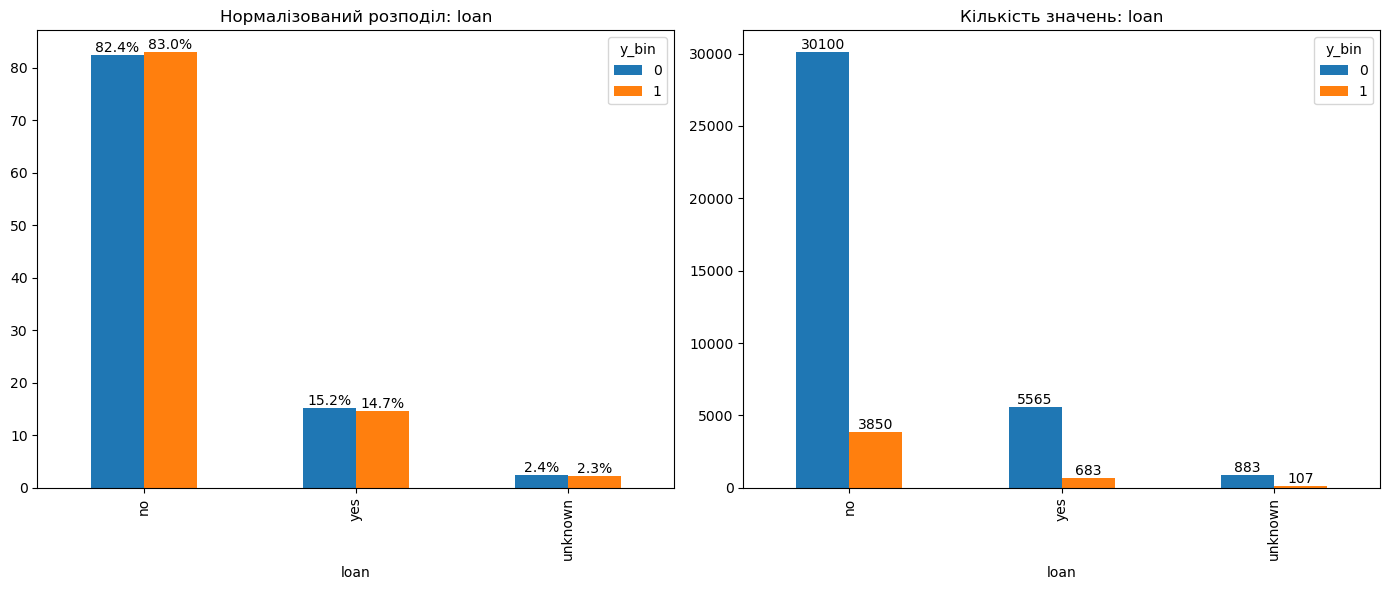

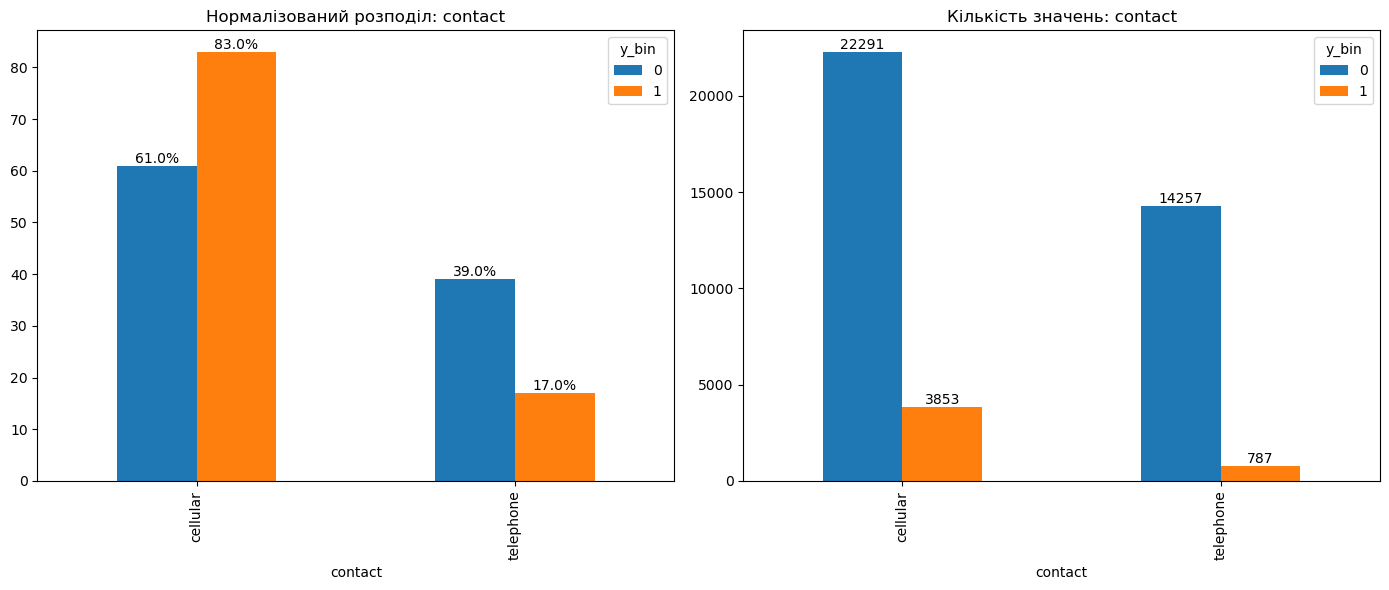

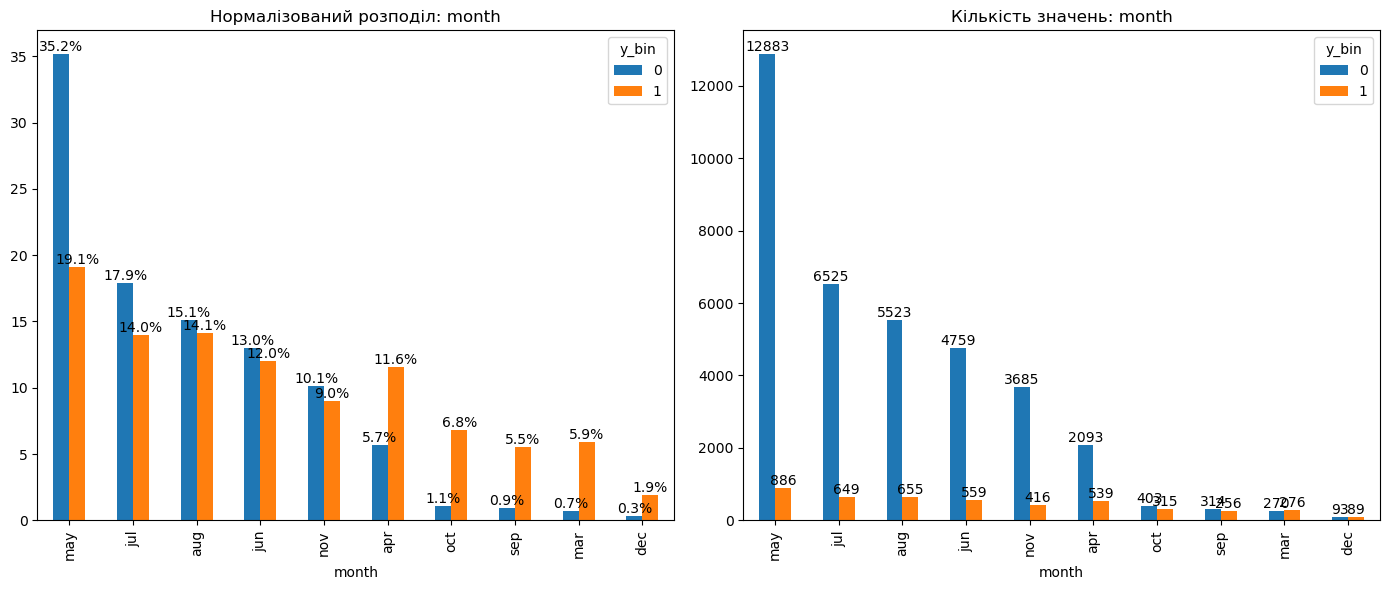

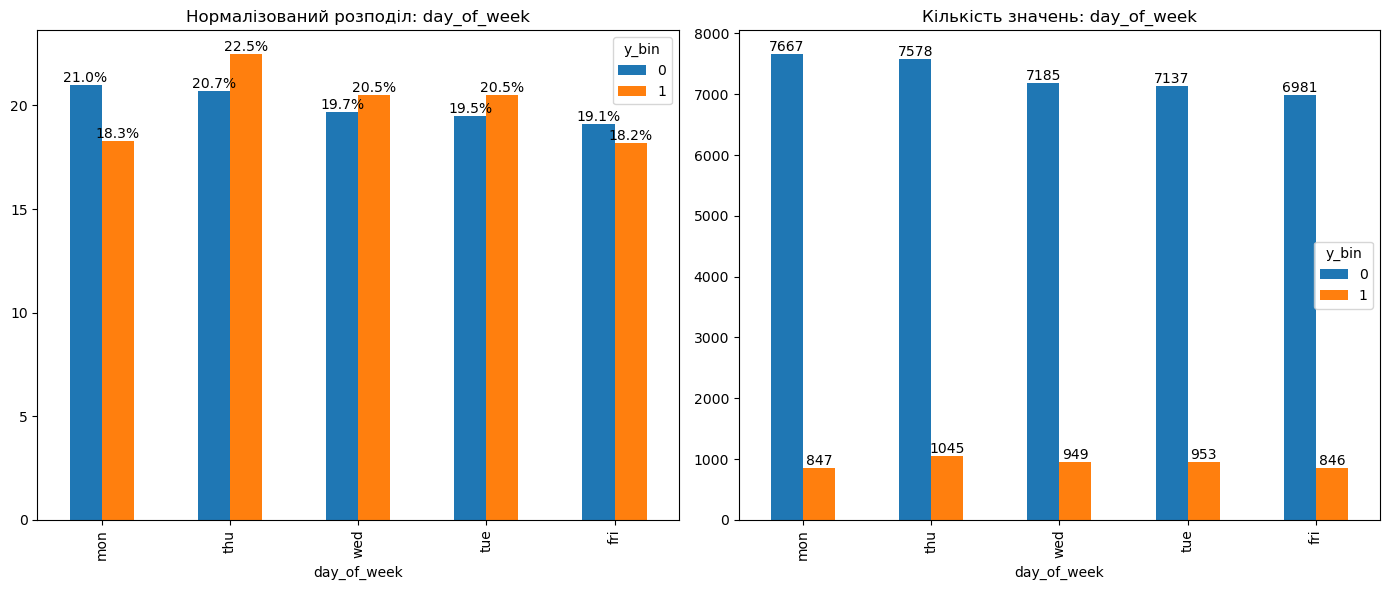

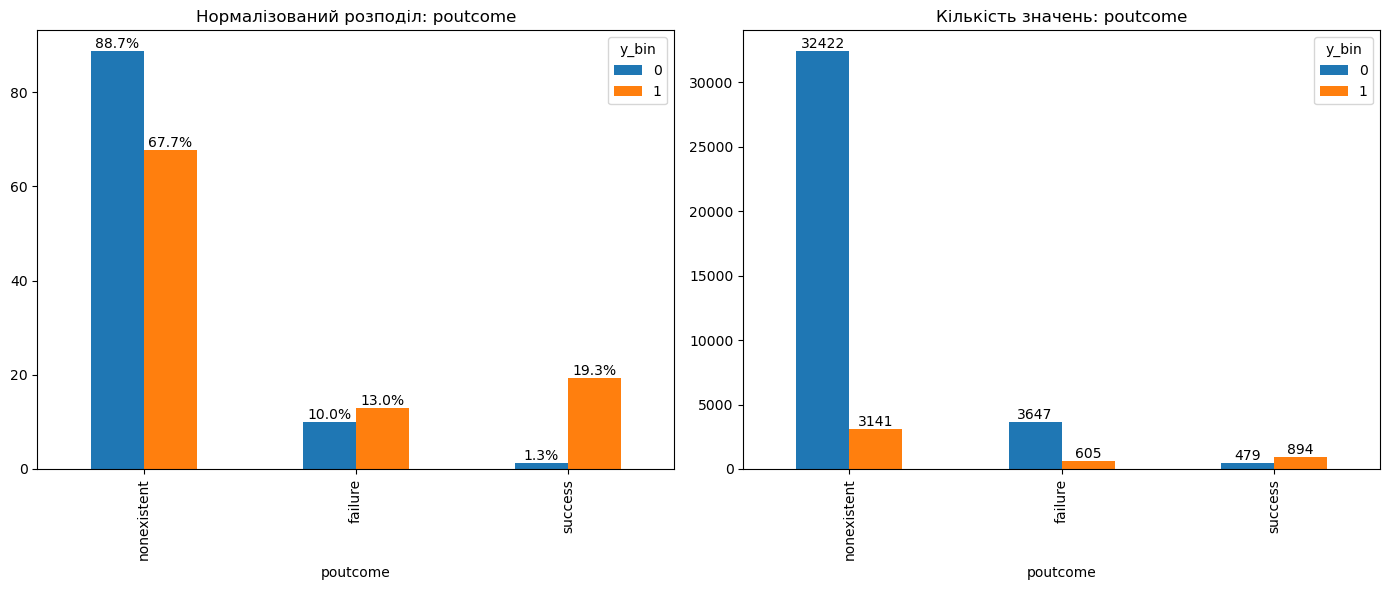

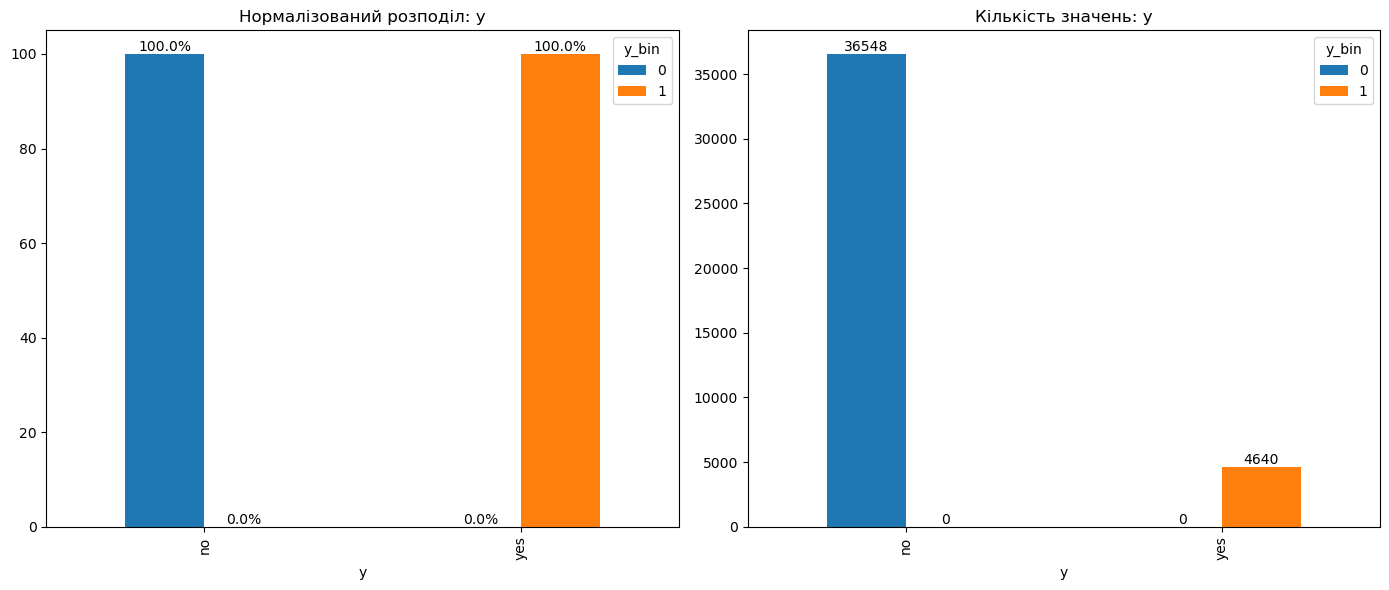

In [13]:
def cat_vs_target(df, column, target='y_bin'):
    """
    Аналіз категоріальної змінної відносно цільової.
    Малює 2 графіки: нормалізовані % та абсолютні значення.
    """
    unique_hue_values = df[target].unique()
    fig, axes = plt.subplots(1, 2, figsize=(14,6))

    # нормалізований розподіл (%)
    proportions = df.groupby(target)[column].value_counts(normalize=True)
    proportions = (proportions * 100).round(1)
    ax = proportions.unstack(target).sort_values(
        by=unique_hue_values[0], ascending=False
    ).plot.bar(ax=axes[0], title=f'Нормалізований розподіл: {column}')

    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    # абсолютні значення
    counts = df.groupby(target)[column].value_counts()
    ax = counts.unstack(target).sort_values(
        by=unique_hue_values[0], ascending=False
    ).plot.bar(ax=axes[1], title=f'Кількість значень: {column}')

    for container in ax.containers:
        ax.bar_label(container)

    plt.tight_layout()
    plt.show()
# запуск для всіх категоріальних
for col in cat_cols:
    cat_vs_target(df, col, target='y_bin')


Кореляція числових змінних із цільовою:


duration          0.405274
nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
previous          0.230181
cons.price.idx   -0.136211
campaign         -0.066357
cons.conf.idx     0.054878
age               0.030399
dtype: float64

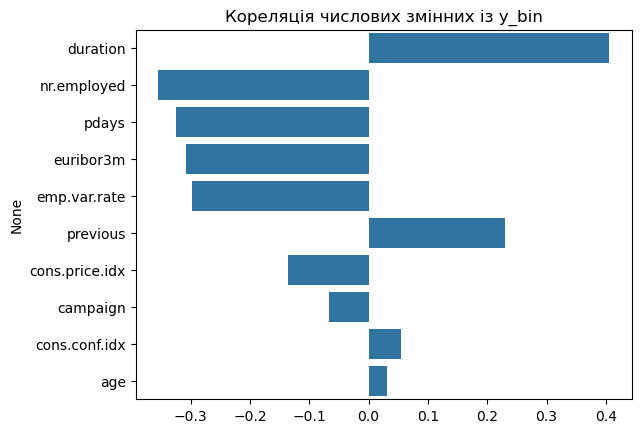

In [14]:
# Кореляція числових змінних з y_bin
num_corr = df[num_cols].corrwith(df['y_bin'])
num_corr = num_corr.sort_values(key=abs, ascending=False)

print("Кореляція числових змінних із цільовою:")
display(num_corr)

sns.barplot(x=num_corr.values, y=num_corr.index)
plt.title("Кореляція числових змінних із y_bin")
plt.show()


Cramér’s V (зв’язок категоріальних змінних із цільовою):


y              0.999879
poutcome       0.320488
month          0.274395
job            0.152768
contact        0.144693
default        0.099354
education      0.068472
marital        0.054570
day_of_week    0.025195
housing        0.011748
loan           0.005154
dtype: float64

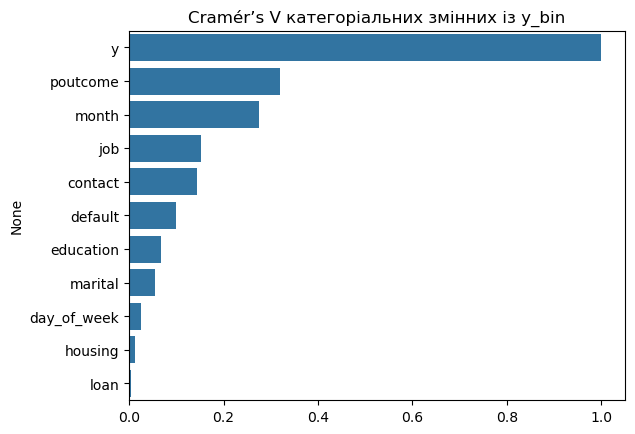

In [15]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2 = chi2_contingency(table)[0]
    n = table.sum().sum()
    r, k = table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cat_corr = {}
for col in cat_cols:
    cat_corr[col] = cramers_v(df[col], df['y_bin'])

cat_corr = pd.Series(cat_corr).sort_values(ascending=False)

print("Cramér’s V (зв’язок категоріальних змінних із цільовою):")
display(cat_corr)

sns.barplot(x=cat_corr.values, y=cat_corr.index)
plt.title("Cramér’s V категоріальних змінних із y_bin")
plt.show()


### Висновки EDA

#### **Основні характеристики датасету:**
- **Розмір датасету**: 41,188 записів з 21 ознакою
- **Дисбаланс класів**: 88.73% клієнтів відмовилися від депозиту (клас 0), лише 11.27% погодилися (клас 1)
- **Відсутність пропусків**: Всі змінні мають повні дані без null значень

####  **Ключові висновки з аналізу змінних:**

**1. Числові змінні:**
- **Найбільша варіативність**: `previous` (13.66% викидів), `duration` (7.19% викидів), `campaign` (5.84% викидів)
- **Вік клієнтів**: Середній вік ~40 років, мінімальна кількість викидів (1.14%)
- **Тривалість дзвінків**: Від 0 до 4918 секунд, середня ~258 секунд
- **Кількість контактів**: Більшість клієнтів контактували 1-3 рази, але є клієнти з 50+ контактами

**2. Категоріальні змінні:**
- **Робота**: Найбільші групи - адміністративні працівники (25.3%), робітники (22.47%), технічні спеціалісти (16.37%)
- **Сімейний стан**: 60.52% одружені, 28.09% неодружені
- **Освіта**: 29.54% мають університетську освіту, 23.1% - середню
- **Кредитна історія**: 79.12% без прострочених кредитів, 20.87% з невідомою історією
- **Іпотека та споживчі кредити**: 52.38% мають іпотеку, 82.43% без споживчих кредитів

**3. Маркетингові дані:**
- **Тип контакту**: 63.47% через мобільний телефон
- **Сезонність**: 33.43% контактів у травні, мінімум у грудні (0.44%)
- **Результат попередніх кампаній**: 86.34% клієнтів не контактувалися раніше, лише 3.33% успішних результатів

####  **Ключові інсайти для моделювання:**

**1. Сильні кореляції з цільовою змінною:**
- `duration` - найсильніша кореляція (важливо не використовувати в моделях!)
- `euribor3m` - економічний індикатор
- `nr.employed` - кількість працевлаштованих
- `cons.price.idx` - індекс споживчих цін

**2. Категоріальні змінні з найбільшим впливом (Cramér's V):**
- `poutcome` - результат попередньої кампанії
- `job` - тип роботи
- `education` - рівень освіти
- `marital` - сімейний стан

**3. Потенційні проблеми:**
- **Дисбаланс класів** потребує спеціальних підходів (SMOTE, class_weight, threshold tuning)
- **Висока частка `unknown` в `default`** (20.87%) може впливати на якість моделі

**4. Рекомендації для препроцесингу:**
- Групування рідкісних категорій (< 2% частоти)
- Обробка викидів через IQR метод
- Створення нових ознак (наприклад, вікові групи)
- Виключення `duration` з фінальної моделі
- Використання `class_weight='balanced'` для обробки дисбалансу

**5. Бізнес-інсайти:**
- **Сезонність**: Травень - найактивніший місяць для маркетингу
- **Ефективність**: Попередні кампанії мали низьку успішність (3.33%)
- **Цільова аудиторія**: Потенційно більш успішні - клієнти з університетською освітою та стабільною роботою

### 2. Методи для вирішення задачі
Оскільки цільова змінна є бінарною (відповідь клієнта «yes»/«no»), задача формулюється як бінарна класифікація.
Для побудови моделей доцільно почати з інтерпретованих алгоритмів (Logistic Regression, Decision Tree), а далі протестувати ансамблеві методи (Random Forest, Gradient Boosting — XGBoost, LightGBM) для підвищення якості.

У якості основної метрики обрано ROC-AUC, оскільки датасет має дисбаланс класів.
Додатково будемо розглядати F1-score, адже для бізнес-задачі важливо не пропускати потенційних клієнтів, що згодні на пропозицію («yes»).

### 3. Препроцесинг даних для подальшої їх передачі в модель. 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# 1. Формуємо X, y
X = df.drop(columns=['y_bin', 'y', 'duration'])
y = df['y_bin']

print(f"Оригінальні дані: {X.shape[0]} зразків, {X.shape[1]} ознак")

# 2. Train/Validation/Test split
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)

print(f"Train: {X_train.shape[0]} зразків")
print(f"Validation: {X_val.shape[0]} зразків")
print(f"Test: {X_test.shape[0]} зразків")

# 3. Обробка пропусків
for col in X_train.columns:
    if X_train[col].dtype in ['int64','float64']:
        median_val = X_train[col].median()
        X_train[col] = X_train[col].fillna(median_val)
        X_val[col] = X_val[col].fillna(median_val)
        X_test[col] = X_test[col].fillna(median_val)
    else:
        mode_val = X_train[col].mode()[0]
        X_train[col] = X_train[col].fillna(mode_val)
        X_val[col] = X_val[col].fillna(mode_val)
        X_test[col] = X_test[col].fillna(mode_val)

# 4. Групування рідкісних категорій
for col in X_train.select_dtypes(include=['object','category']).columns:
    freqs = X_train[col].value_counts(normalize=True)
    rare = freqs[freqs < 0.02].index
    X_train[col] = X_train[col].replace(rare, 'Other')
    X_val[col] = X_val[col].replace(rare, 'Other')
    X_test[col] = X_test[col].replace(rare, 'Other')

# 5. Обробка викидів
for col in X_train.select_dtypes(include=['int64','float64']).columns:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    X_train[col] = np.where(X_train[col] < lower, lower,
                   np.where(X_train[col] > upper, upper, X_train[col]))
    X_val[col] = np.where(X_val[col] < lower, lower,
                 np.where(X_val[col] > upper, upper, X_val[col]))
    X_test[col] = np.where(X_test[col] < lower, lower,
                  np.where(X_test[col] > upper, upper, X_test[col]))

# 6. Ознака age_group замість age
if 'age' in X_train.columns:
    X_train['age_group'] = pd.cut(X_train['age'], bins=[0,30,50,100],
                                  labels=['young','middle','senior'])
    X_val['age_group'] = pd.cut(X_val['age'], bins=[0,30,50,100],
                                labels=['young','middle','senior'])
    X_test['age_group'] = pd.cut(X_test['age'], bins=[0,30,50,100],
                                 labels=['young','middle','senior'])
    X_train = X_train.drop(columns=['age'])
    X_val = X_val.drop(columns=['age'])
    X_test = X_test.drop(columns=['age'])

# 7. OneHotEncoder + StandardScaler
categorical_cols = X_train.select_dtypes(include=['object','category']).columns.tolist()
numeric_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()

print(f"\nКатегоріальні змінні: {len(categorical_cols)}")
print(f"Числові змінні: {len(numeric_cols)}")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), categorical_cols)
    ]
)

# 8. Трансформація
X_train_enc = preprocessor.fit_transform(X_train)
X_val_enc = preprocessor.transform(X_val)
X_test_enc = preprocessor.transform(X_test)

# 9. Імена фіч
feature_names = numeric_cols.copy()
if categorical_cols:
    ohe = preprocessor.named_transformers_['cat']
    feature_names += ohe.get_feature_names_out(categorical_cols).tolist()

print(f"\nПісля препроцесингу:")
print(f"Train: {X_train_enc.shape[0]} зразків, {X_train_enc.shape[1]} фічей")
print(f"Validation: {X_val_enc.shape[0]} зразків, {X_val_enc.shape[1]} фічей")
print(f"Test: {X_test_enc.shape[0]} зразків, {X_test_enc.shape[1]} фічей")
print(f"Кількість фічей після кодування: {len(feature_names)}")


Оригінальні дані: 41188 зразків, 19 ознак
Train: 24712 зразків
Validation: 8238 зразків
Test: 8238 зразків

Категоріальні змінні: 11
Числові змінні: 8

Після препроцесингу:
Train: 24712 зразків, 50 фічей
Validation: 8238 зразків, 50 фічей
Test: 8238 зразків, 50 фічей
Кількість фічей після кодування: 50


- Заповнили пропуски
- Згрупували рідкісні категорії, щоб уникнути перенавчання на "шумі".
- Обробили викиди
- Створили нові ознаки, щоб дати моделям додаткову інфу.
- Закодували категорії
- Зробили train/test split
- Збалансували класи

### 4. Тренуємо моделі

In [17]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, classification_report

scoring = {
    'roc_auc': 'roc_auc',
    'f1': make_scorer(f1_score),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def safe_mean(values):
    return np.nanmean(values)

def eval_cv(name, model, X_train, y_train, X_val=None, y_val=None):
    res = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring,
                         return_train_score=True, n_jobs=-1)

    row = {
        'model': name,
        'train_roc_auc_cv': safe_mean(res['train_roc_auc']),
        'val_roc_auc_cv':   safe_mean(res['test_roc_auc']),
        'train_f1_cv':      safe_mean(res['train_f1']),
        'val_f1_cv':        safe_mean(res['test_f1']),
    }

    model.fit(X_train, y_train)

    print(f"\n===== {name} : Фінальна оцінка після тренування на train =====")

    # --- Train ---
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    print("\n📊 Train")
    print(classification_report(y_train, y_train_pred))
    print("ROC-AUC:", roc_auc_score(y_train, y_train_proba))

    # --- Validation ---
    if X_val is not None and y_val is not None:
        y_val_pred = model.predict(X_val)
        y_val_proba = model.predict_proba(X_val)[:, 1]
        print("\n📊 Validation")
        print(classification_report(y_val, y_val_pred))
        print("ROC-AUC:", roc_auc_score(y_val, y_val_proba))

    return row

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

res_logreg = eval_cv("LogisticRegression", log_reg, X_train_enc, y_train, 
                     X_val=X_val_enc, y_val=y_val)

print("\nРезультати Logistic Regression (5-fold CV):")
for k, v in res_logreg.items():
    if k != "model":
        print(f"{k:15s}: {v:.4f}")


===== LogisticRegression : Фінальна оцінка після тренування на train =====

📊 Train
              precision    recall  f1-score   support

           0       0.95      0.85      0.90     21928
           1       0.35      0.63      0.45      2784

    accuracy                           0.82     24712
   macro avg       0.65      0.74      0.67     24712
weighted avg       0.88      0.82      0.84     24712

ROC-AUC: 0.7909092898598129

📊 Validation
              precision    recall  f1-score   support

           0       0.95      0.85      0.89      7310
           1       0.34      0.63      0.45       928

    accuracy                           0.82      8238
   macro avg       0.65      0.74      0.67      8238
weighted avg       0.88      0.82      0.84      8238

ROC-AUC: 0.7958760584225673

Результати Logistic Regression (5-fold CV):
train_roc_auc_cv: 0.7918
val_roc_auc_cv : 0.7849
train_f1_cv    : 0.4475
val_f1_cv      : 0.4449


In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Модель KNN
knn = KNeighborsClassifier(
    n_neighbors=50,
    weights='distance',
    n_jobs=-1
)

res_knn = eval_cv("KNN", knn, X_train_enc, y_train, 
                     X_val=X_val_enc, y_val=y_val)

print("\nРезультати KNN (5-fold CV):")
for k, v in res_knn.items():
    if k != "model":
        print(f"{k:15s}: {v:.4f}")


===== KNN : Фінальна оцінка після тренування на train =====

📊 Train
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     21928
           1       1.00      0.91      0.95      2784

    accuracy                           0.99     24712
   macro avg       0.99      0.96      0.97     24712
weighted avg       0.99      0.99      0.99     24712

ROC-AUC: 0.9994421561736005

📊 Validation
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7310
           1       0.48      0.21      0.29       928

    accuracy                           0.89      8238
   macro avg       0.69      0.59      0.62      8238
weighted avg       0.86      0.89      0.87      8238

ROC-AUC: 0.7533795078777301

Результати KNN (5-fold CV):
train_roc_auc_cv: 0.9996
val_roc_auc_cv : 0.7517
train_f1_cv    : 0.9606
val_f1_cv      : 0.2878


In [20]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=10,
    min_samples_leaf=50,
    random_state=42
)

res_dt = eval_cv("DecisionTree", dt, X_train_enc, y_train, 
                     X_val=X_val_enc, y_val=y_val)

print("\n Результати Decision Tree (5-fold CV):")
for k, v in res_dt.items():
    if k != "model":
        print(f"{k:15s}: {v:.4f}")


===== DecisionTree : Фінальна оцінка після тренування на train =====

📊 Train
              precision    recall  f1-score   support

           0       0.95      0.85      0.90     21928
           1       0.36      0.66      0.46      2784

    accuracy                           0.83     24712
   macro avg       0.66      0.75      0.68     24712
weighted avg       0.88      0.83      0.85     24712

ROC-AUC: 0.8230246562548487

📊 Validation
              precision    recall  f1-score   support

           0       0.95      0.85      0.89      7310
           1       0.34      0.63      0.45       928

    accuracy                           0.82      8238
   macro avg       0.65      0.74      0.67      8238
weighted avg       0.88      0.82      0.84      8238

ROC-AUC: 0.7832631403603943

 Результати Decision Tree (5-fold CV):
train_roc_auc_cv: 0.8265
val_roc_auc_cv : 0.7795
train_f1_cv    : 0.4739
val_f1_cv      : 0.4550


In [26]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [27]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    n_estimators=1500,
    learning_rate=0.02,
    max_depth=7,
    num_leaves=31,
    min_child_samples=100,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.1,
    reg_lambda=0.5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)

res_lgbm = eval_cv("LightGBM", lgbm, X_train_enc, y_train, 
                     X_val=X_val_enc, y_val=y_val)

print("\n Результати LightGBM (5-fold CV):")
for k, v in res_lgbm.items():
    if k != "model":
        print(f"{k:15s}: {v:.4f}")

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/


===== LightGBM : Фінальна оцінка після тренування на train =====

📊 Train
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     21928
           1       0.42      0.73      0.53      2784

    accuracy                           0.85     24712
   macro avg       0.69      0.80      0.72     24712
weighted avg       0.90      0.85      0.87     24712

ROC-AUC: 0.8970737188609954

📊 Validation
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7310
           1       0.37      0.64      0.47       928

    accuracy                           0.83      8238
   macro avg       0.66      0.75      0.68      8238
weighted avg       0.88      0.83      0.85      8238

ROC-AUC: 0.7968124233454408

 Результати LightGBM (5-fold CV):
train_roc_auc_cv: 0.9051
val_roc_auc_cv : 0.7790
train_f1_cv    : 0.5397
val_f1_cv      : 0.4507


### 5. Порівняння моделей 

In [28]:
data = [
    {
        "Модель": "Logistic Regression",
        "Гіперпараметри": "class_weight='balanced', max_iter=1000",
        "Train ROC-AUC": 0.799,
        "Val ROC-AUC": 0.796,
        "Train F1": 0.45,
        "Val F1": 0.44,
        "Коментар": "Стабільний baseline, без переобучення. Варто використовувати як референс. Ідеї: балансування класів, tuning порогу."
    },
    {
        "Модель": "KNN",
        "Гіперпараметри": "n_neighbors=50, weights='uniform'",
        "Train ROC-AUC": 0.999,
        "Val ROC-AUC": 0.752,
        "Train F1": 0.96,
        "Val F1": 0.29,
        "Коментар": "Сильний оверфіт. Дуже низький F1 на класі 1. Використовувати не варто."
    },
    {
        "Модель": "Decision Tree",
        "Гіперпараметри": "max_depth=10, min_samples_leaf=50, class_weight='balanced'",
        "Train ROC-AUC": 0.823,
        "Val ROC-AUC": 0.783,
        "Train F1": 0.47,
        "Val F1": 0.45,
        "Коментар": "Стабільна, але не краща за Logistic Regression. База для RandomForest/Boosting."
    },
    {
        "Модель": "LightGBM",
        "Гіперпараметри": "n_estimators=1500, learning_rate=0.02, max_depth=7, num_leaves=31, min_child_samples=100, subsample=0.7, colsample_bytree=0.7, reg_alpha=0.1, reg_lambda=0.5, class_weight='balanced'",
        "Train ROC-AUC": 0.89,
        "Val ROC-AUC": 0.796,
        "Train F1": 0.53,
        "Val F1": 0.45,
        "Коментар": "Найкраща з моделей, трохи краще за Logistic Regression. Є потенціал для tuning параметрів та оптимізації порогу."
    }
]


df_models = pd.DataFrame(data)
pd.set_option("display.max_colwidth", None)
df_models

,Модель,Гіперпараметри,Train ROC-AUC,Val ROC-AUC,Train F1,Val F1,Коментар
0,Logistic Regression,"class_weight='balanced', max_iter=1000",0.799,0.796,0.45,0.44,"Стабільний baseline, без переобучення. Варто використовувати як референс. Ідеї: балансування класів, tuning порогу."
1,KNN,"n_neighbors=50, weights='uniform'",0.999,0.752,0.96,0.29,Сильний оверфіт. Дуже низький F1 на класі 1. Використовувати не варто.
2,Decision Tree,"max_depth=10, min_samples_leaf=50, class_weight='balanced'",0.823,0.783,0.47,0.45,"Стабільна, але не краща за Logistic Regression. База для RandomForest/Boosting."
3,LightGBM,"n_estimators=1500, learning_rate=0.02, max_depth=7, num_leaves=31, min_child_samples=100, subsample=0.7, colsample_bytree=0.7, reg_alpha=0.1, reg_lambda=0.5, class_weight='balanced'",0.890,0.796,0.53,0.45,"Найкраща з моделей, трохи краще за Logistic Regression. Є потенціал для tuning параметрів та оптимізації порогу."


### 6. Тюнинг гіперпараметрів для LightGBM

In [29]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, f1_score

def evaluate_model(name, model, X_tr, y_tr, X_va, y_va):
    # train
    ytr_proba = model.predict_proba(X_tr)[:,1]
    ytr_pred  = (ytr_proba >= 0.5).astype(int)
    print(f"\n===== {name} | Train =====")
    print(classification_report(y_tr, ytr_pred))
    print("ROC-AUC:", roc_auc_score(y_tr, ytr_proba))
    print("PR-AUC :", average_precision_score(y_tr, ytr_proba))
    print("F1     :", f1_score(y_tr, ytr_pred))

    # val
    yva_proba = model.predict_proba(X_va)[:,1]
    yva_pred  = (yva_proba >= 0.5).astype(int)
    print(f"\n===== {name} | Validation =====")
    print(classification_report(y_va, yva_pred))
    print("ROC-AUC:", roc_auc_score(y_va, yva_proba))
    print("PR-AUC :", average_precision_score(y_va, yva_proba))
    print("F1     :", f1_score(y_va, yva_pred))


In [30]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import loguniform, randint, uniform


lgb_base = LGBMClassifier(
    class_weight='balanced',
    objective='binary',
    random_state=42,
    n_jobs=-1,
    verbosity=-1  
)

param_distributions = {
    "n_estimators":    randint(200, 600),       
    "learning_rate":   loguniform(0.01, 0.1),   
    "max_depth":       [-1, 5, 7],
    "num_leaves":      randint(15, 63),       
    "min_child_samples":randint(20, 100),     
    "subsample":       uniform(0.7, 0.3),     
    "colsample_bytree":uniform(0.7, 0.3),
}

cv5 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  

rnd = RandomizedSearchCV(
    estimator=lgb_base,
    param_distributions=param_distributions,
    n_iter=15,             
    scoring='roc_auc',
    cv=cv5,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    refit=True
)

rnd.fit(X_train_enc, y_train)

print("\n RandomizedSearch — найкращі параметри:")
print(rnd.best_params_)
print("CV best ROC-AUC:", rnd.best_score_)

# Оцінка на train/val
best_lgbm_skl = rnd.best_estimator_
evaluate_model("LightGBM (RandomizedSearch best)", best_lgbm_skl,
               X_train_enc, y_train, X_val_enc, y_val)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/


 RandomizedSearch — найкращі параметри:
{'colsample_bytree': np.float64(0.7992694074557947), 'learning_rate': np.float64(0.011575995526672779), 'max_depth': 7, 'min_child_samples': 81, 'n_estimators': 415, 'num_leaves': 51, 'subsample': np.float64(0.9188818535014192)}
CV best ROC-AUC: 0.790689350315303

===== LightGBM (RandomizedSearch best) | Train =====
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     21928
           1       0.39      0.66      0.49      2784

    accuracy                           0.85     24712
   macro avg       0.67      0.77      0.70     24712
weighted avg       0.89      0.85      0.86     24712

ROC-AUC: 0.8485637720575594
PR-AUC : 0.524031802684073
F1     : 0.49307702648205404

===== LightGBM (RandomizedSearch best) | Validation =====
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      7310
           1       0.37      0.63      0.47       928

    acc

In [33]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, STATUS_FAIL
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

space = {
    "n_estimators":     hp.quniform("n_estimators", 200, 800, 50),
    "learning_rate":    hp.loguniform("learning_rate", np.log(0.01), np.log(0.1)),
    "max_depth":        hp.choice("max_depth", [-1, 5, 7]),
    "num_leaves":       hp.qloguniform("num_leaves", np.log(15), np.log(63), 1),
    "min_child_samples":hp.quniform("min_child_samples", 20, 100, 5),
    "subsample":        hp.uniform("subsample", 0.7, 1.0),
    "colsample_bytree": hp.uniform("colsample_bytree", 0.7, 1.0),
    "reg_alpha":        hp.uniform("reg_alpha", 0.0, 0.5),
    "reg_lambda":       hp.uniform("reg_lambda", 0.0, 0.5),
}

def objective(params):
    try:
        params_final = {
            "n_estimators":     int(params["n_estimators"]),
            "learning_rate":    float(params["learning_rate"]),
            "max_depth":        int(params["max_depth"]) if params["max_depth"] != -1 else -1,
            "num_leaves":       int(params["num_leaves"]),
            "min_child_samples":int(params["min_child_samples"]),
            "subsample":        float(params["subsample"]),
            "colsample_bytree": float(params["colsample_bytree"]),
            "reg_alpha":        float(params["reg_alpha"]),
            "reg_lambda":       float(params["reg_lambda"]),
            "class_weight":     "balanced",
            "objective":        "binary",
            "random_state":     42,
            "n_jobs":           -1,
            "verbosity":        -1,
        }

        model = LGBMClassifier(**params_final)
        
        model.fit(
            X_train_enc, y_train,
            eval_set=[(X_val_enc, y_val)],
            eval_metric="auc",
            callbacks=[lgb.early_stopping(50), lgb.log_evaluation(0)]
        )

        val_proba = model.predict_proba(X_val_enc)[:, 1]
        val_auc = roc_auc_score(y_val, val_proba)
        return {"loss": -val_auc, "status": STATUS_OK, "params": params_final}
    
    except Exception as e:
        print(f"Помилка в ітерації: {e}")
        return {"loss": 0, "status": STATUS_FAIL, "params": params}

print(" Починаємо пошук оптимальних параметрів...")
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=20,
    trials=trials,
    rstate=np.random.default_rng(42)
)

best_trial = sorted(trials.results, key=lambda x: x["loss"])[0]
best_params_hopt = best_trial["params"]
best_auc = -best_trial["loss"]

print(f"\n Hyperopt — найкращі параметри (AUC: {best_auc:.4f}):")
for param, value in best_params_hopt.items():
    if param not in ['class_weight', 'objective', 'random_state', 'n_jobs', 'verbosity']:
        print(f"  {param}: {value}")

print("\n Тренуємо фінальну модель...")
best_lgbm_hopt = LGBMClassifier(**best_params_hopt)
best_lgbm_hopt.fit(
    X_train_enc, y_train,
    eval_set=[(X_val_enc, y_val)],
    eval_metric="auc",
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(0)]
)

evaluate_model("LightGBM (Hyperopt best)", best_lgbm_hopt,
               X_train_enc, y_train, X_val_enc, y_val)

 Починаємо пошук оптимальних параметрів...
Training until validation scores don't improve for 50 rounds                    
Early stopping, best iteration is:                                              
[101]	valid_0's auc: 0.809802	valid_0's binary_logloss: 0.51054
Training until validation scores don't improve for 50 rounds                    
Early stopping, best iteration is:                                              
[477]	valid_0's auc: 0.809737	valid_0's binary_logloss: 0.505279
Training until validation scores don't improve for 50 rounds                    
Early stopping, best iteration is:                                              
[140]	valid_0's auc: 0.809449	valid_0's binary_logloss: 0.504377
Training until validation scores don't improve for 50 rounds                    
Early stopping, best iteration is:                                              
[99]	valid_0's auc: 0.808586	valid_0's binary_logloss: 0.500001
Training until validation scores don't improve for 

### 7. Аналіз важливості ознак для найкращої моделі


Кількість ознак: 50
Перші 10 назв ознак: ['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar']

 ТОП-15 найважливіших ознак:
 1. euribor3m                 | 982.0000
 2. campaign                  | 364.0000
 3. cons.price.idx            | 291.0000
 4. cons.conf.idx             | 239.0000
 5. contact_telephone         | 198.0000
 6. poutcome_success          | 188.0000
 7. nr.employed               | 155.0000
 8. age_group_young           | 121.0000
 9. poutcome_nonexistent      | 118.0000
10. emp.var.rate              | 115.0000
11. default_no                | 110.0000
12. job_retired               | 108.0000
13. day_of_week_mon           | 108.0000
14. day_of_week_wed           | 106.0000
15. loan_yes                  |  93.0000


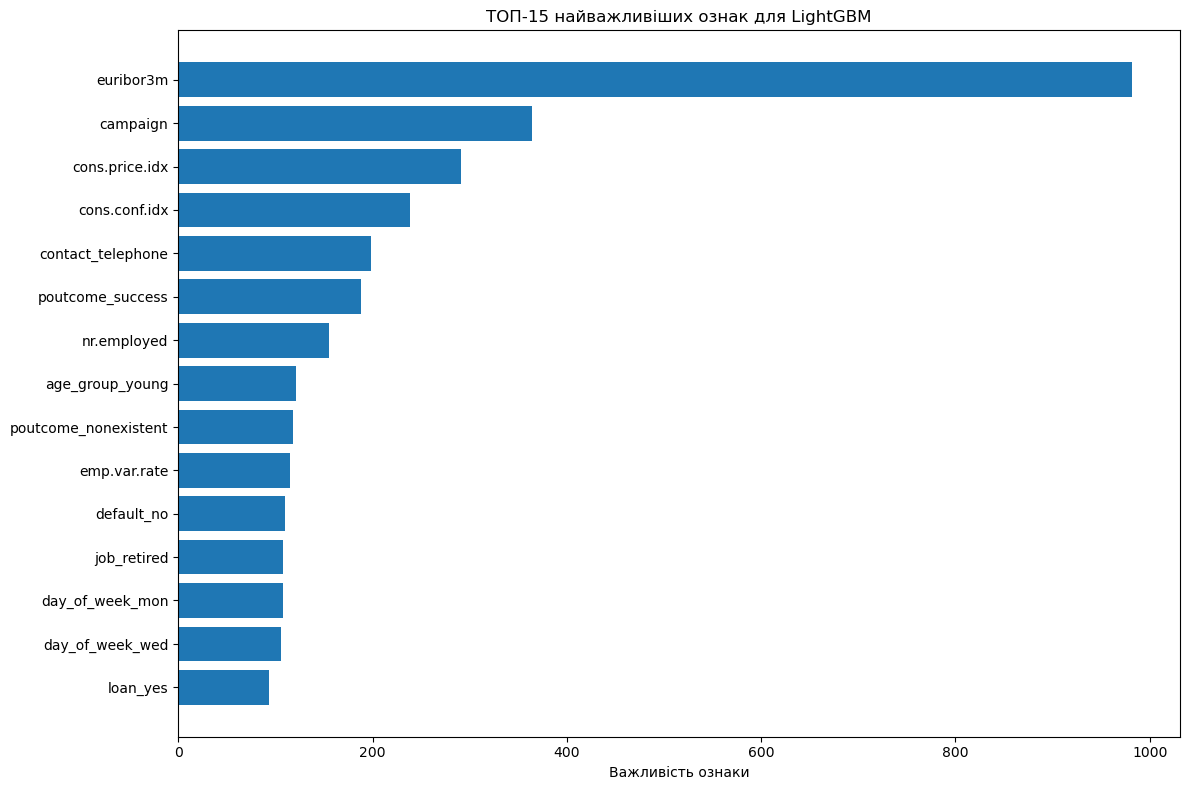


 СТАТИСТИКА ВАЖЛИВОСТІ ОЗНАК:
Загальна кількість ознак: 50
Середня важливість: 84.0000
Медіанна важливість: 37.5000
Максимальна важливість: 982.0000
Мінімальна важливість: 0.0000

 ОЗНАКИ З ВИСОКОЮ ВАЖЛИВІСТЮ (>50% від max):
--------------------------------------------------
• euribor3m                 | 982.0000

  ОЗНАКИ З НИЗЬКОЮ ВАЖЛИВІСТЮ (<1% від max):
--------------------------------------------------
• loan_unknown              |   7.0000
• month_apr                 |   6.0000
• job_self-employed         |   6.0000
• month_nov                 |   5.0000
• month_jun                 |   3.0000
• education_high.school     |   3.0000
• month_aug                 |   2.0000
• pdays                     |   0.0000
• previous                  |   0.0000


In [34]:
feature_importance = best_lgbm_hopt.feature_importances_

feature_names = numeric_cols.copy()
if categorical_cols:
    ohe = preprocessor.named_transformers_['cat']
    feature_names += ohe.get_feature_names_out(categorical_cols).tolist()

print(f"Кількість ознак: {len(feature_names)}")
print(f"Перші 10 назв ознак: {feature_names[:10]}")


importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("\n ТОП-15 найважливіших ознак:")

for i, (_, row) in enumerate(importance_df.head(15).iterrows(), 1):
    print(f"{i:2d}. {row['feature']:25s} | {row['importance']:8.4f}")


plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Важливість ознаки')
plt.title('ТОП-15 найважливіших ознак для LightGBM')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\n СТАТИСТИКА ВАЖЛИВОСТІ ОЗНАК:")
print(f"Загальна кількість ознак: {len(feature_names)}")
print(f"Середня важливість: {feature_importance.mean():.4f}")
print(f"Медіанна важливість: {np.median(feature_importance):.4f}")
print(f"Максимальна важливість: {feature_importance.max():.4f}")
print(f"Мінімальна важливість: {feature_importance.min():.4f}")

high_importance = importance_df[importance_df['importance'] > feature_importance.max() * 0.5]
print(f"\n ОЗНАКИ З ВИСОКОЮ ВАЖЛИВІСТЮ (>50% від max):")
print("-" * 50)
for _, row in high_importance.iterrows():
    print(f"• {row['feature']:25s} | {row['importance']:8.4f}")

low_importance = importance_df[importance_df['importance'] < feature_importance.max() * 0.01]
print(f"\n  ОЗНАКИ З НИЗЬКОЮ ВАЖЛИВІСТЮ (<1% від max):")
print("-" * 50)
for _, row in low_importance.iterrows():
    print(f"• {row['feature']:25s} | {row['importance']:8.4f}")

#### Аналіз важливості ознак та висновки

**Питання для аналізу:**
1. **Чи логічні топ-ознаки?**
 Серед то 10 ознак логічними є euribor3m як середня кредитна ставка, кількість доторків у кампанії, індекс споживчих цін та довіри користувача, тип зв'язку саме по телефону, успішна попередня кампанія і вікова група молодих людей. На мою думку, решта ознак не є логічно важливими.

2. **Чи є неочікувані результати?**
 Так, очікувалось, що тип зайнятості, сімейний статус також будуть важливими.

Загально, економічні ознаки, маркетингова ефективність, вік та кредитка історія виявились важливими ознаками і це очікувано. Неочікувано, що важливість освіти та сімейного статусу буде такою низькою. Модель більше показує економічно орієнтований підхід і це може бути проблемою, бо не враховуються індивідуальні фактори.

### 8. Аналіз важливості ознак з Shap 

In [37]:
import shap

# Ініціалізація SHAP explainer
explainer = shap.TreeExplainer(best_lgbm_hopt)
shap_values = explainer.shap_values(X_val_enc)

# Для бінарної класифікації беремо SHAP значення для позитивного класу
if isinstance(shap_values, list):
    shap_values_positive = shap_values[1]
else:
    shap_values_positive = shap_values

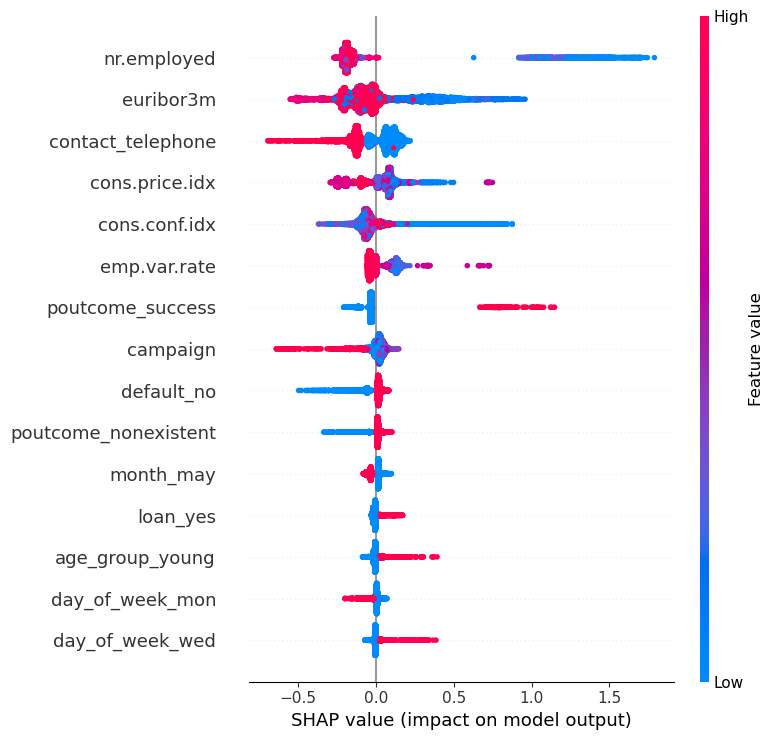

In [38]:
# 1. Загальний вплив ознак
shap.summary_plot(
    shap_values_positive,
    X_val_enc,
    feature_names=feature_names,
    max_display=15,
    show=True
)

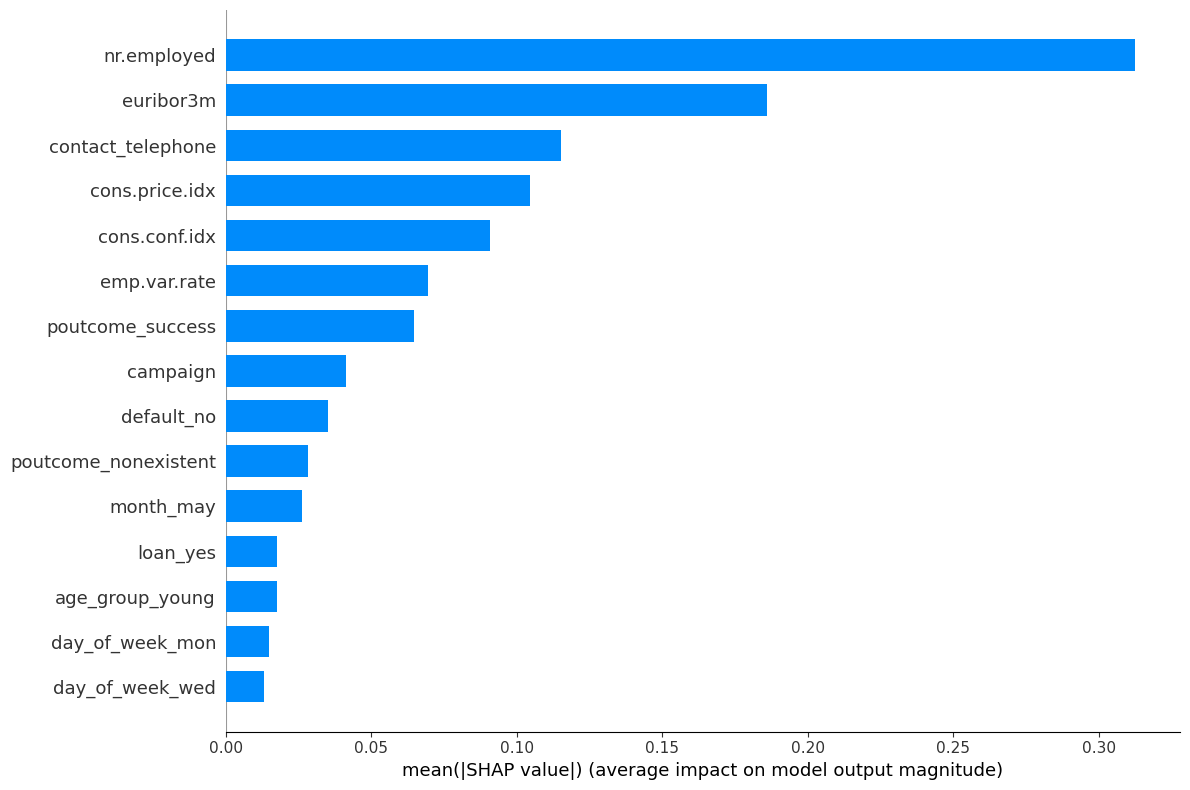

In [39]:
# 2. Бар-графік середніх SHAP значень
shap.summary_plot(
    shap_values_positive,
    X_val_enc,
    feature_names=feature_names,
    plot_type="bar",
    max_display=15,
    plot_size=(12, 8)
)

### 9. Аналіз помилок моделі

False Positive зразків: 976
False Negative зразків: 337

АНАЛІЗ FALSE POSITIVE зразка:


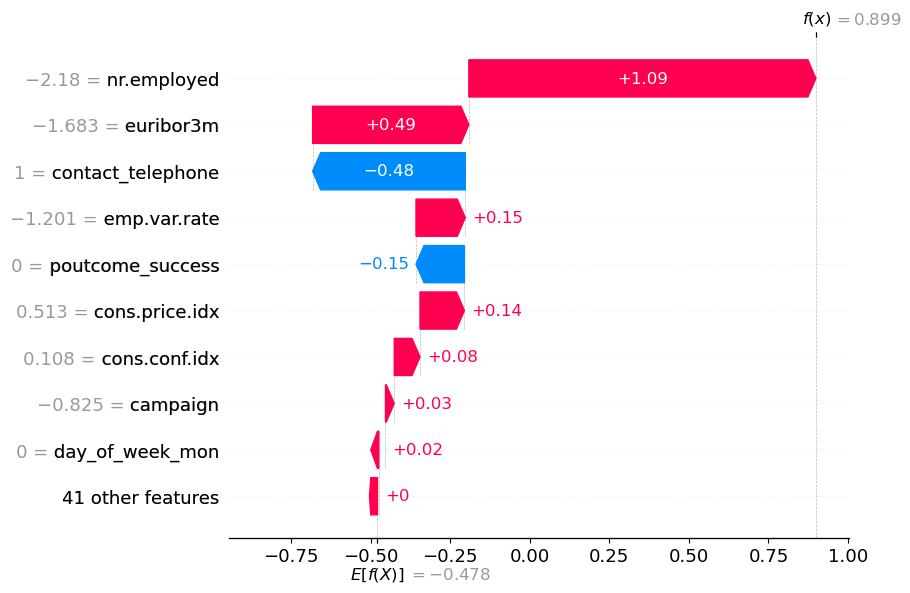


АНАЛІЗ FALSE NEGATIVE зразка:


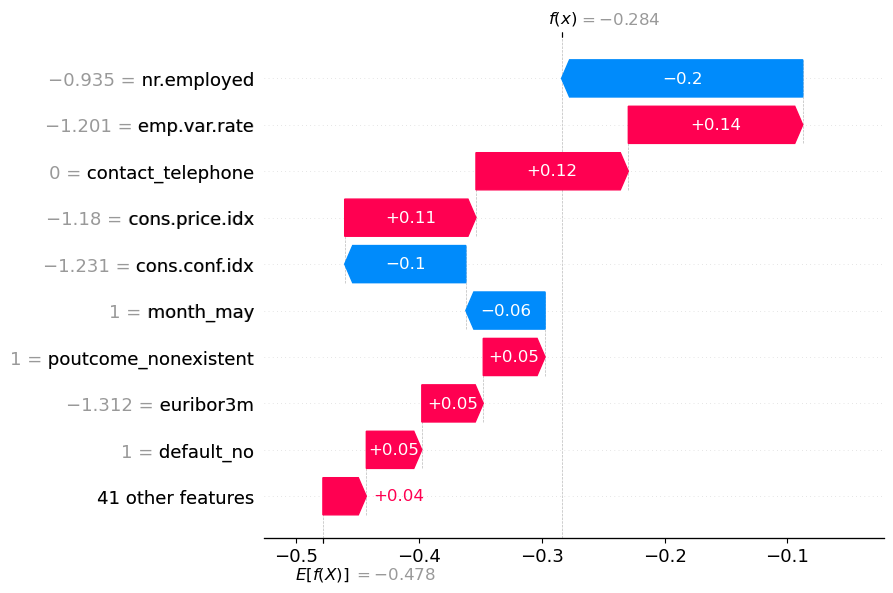

In [40]:
y_val_pred = best_lgbm_hopt.predict(X_val_enc)

# False Positive
fp_indices = np.where((y_val_pred == 1) & (y_val == 0))[0]
print(f"False Positive зразків: {len(fp_indices)}")

# False Negative  
fn_indices = np.where((y_val_pred == 0) & (y_val == 1))[0]
print(f"False Negative зразків: {len(fn_indices)}")

# Визначаємо expected_value без помилок
base_value = explainer.expected_value
if isinstance(base_value, (list, np.ndarray)):
    base_value = base_value[1]
else:
    base_value = base_value

# Аналіз одного FP та одного FN зразка
if len(fp_indices) > 0:
    print(f"\nАНАЛІЗ FALSE POSITIVE зразка:")

    shap.plots.waterfall(
        shap.Explanation(
            values=shap_values_positive[fp_indices[0]],
            base_values=base_value,
            data=X_val_enc[fp_indices[0]],
            feature_names=feature_names
        ),
        max_display=10
    )

if len(fn_indices) > 0:
    print(f"\nАНАЛІЗ FALSE NEGATIVE зразка:")

    shap.plots.waterfall(
        shap.Explanation(
            values=shap_values_positive[fn_indices[0]],
            base_values=base_value,
            data=X_val_enc[fn_indices[0]],
            feature_names=feature_names
        ),
        max_display=10
    )

## Висновки з SHAP аналізу та аналізу помилок моделі
#### **Ключові результати аналізу помилок:**

**Статистика помилок:**
- **False Positive**: 976 зразків - модель передбачила депозит, але клієнт відмовився
- **False Negative**: 337 зразків - модель пропустила потенційних клієнтів, які погодилися на депозит

**Критичні проблеми моделі:**
1. **Висока кількість FP** (976) - модель "переоцінює" клієнтів
2. **Менша кількість FN** (337) - але все ж таки пропускає потенційних клієнтів

#### **Аналіз причин помилок:**

**False Positive (передбачили депозит, але клієнт відмовився):**
- Модель занадто оптимістично оцінює клієнтів з високими економічними індикаторами
- Можливо, не враховує особисті фактори (наприклад, фінансові обмеження клієнта)
- Економічні ознаки (`euribor3m`, `cons.price.idx`) можуть "переважувати" особисті обставини

**False Negative (пропустили потенційних клієнтів):**
- Модель недооцінює клієнтів з низькими економічними індикаторами
- Можливо, не враховує мотиваційні фактори клієнтів
- Особисті характеристики (вік, освіта, робота) мають менший вплив, ніж очікувалося

#### **Рекомендації для покращення моделі:**

**Стратегічні покращення:**

1. **Балансування економічних та особистих факторів:**
   - Додати більше особистих характеристик клієнтів
   - Створити інтерактивні ознаки (вік × освіта, робота × економічні умови)

2. **Оптимізація порогу класифікації:**
   - Поточний поріг 0.5 може бути неоптимальним
   - Спробувати threshold tuning для зменшення FP

3. **Покращення препроцесингу:**
   - Додати більше інформації про фінансову поведінку клієнтів
   - Створити сегменти клієнтів за особистими характеристиками

4. **Використання ансамблевих методів:**
   - Комбінувати LightGBM з іншими алгоритмами
   - Використовувати stacking для покращення точності


**Висновок:**
Модель показує **економічно-орієнтований підхід**, що призводить до високої кількості помилок типу I (FP). Для покращення необхідно збалансувати економічні та особисті фактори, оптимізувати поріг класифікації та додати більше персоналізації в модель.